# TP Integrador análisis de datos:

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado. Trabajaremos con un dataset de Kaggle con datos de por distintas estaciones meteorológicas de Australia. El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos meteorológicos del día actual.

### Dataset: 
El dataset weatherAUS es un dataset que contiene más de 140 mil observaciones climatológicas de estaciones meteorológicas en el territorio australiano, el data set contiene las siguientes variables:

* **Date:** Fecha de la observación.
* **Location:** Nombre de la estación metereológica.
* **MinTemp:** Temperatura minima en grados Celsius.
* **MaxTemp:** Temperatura máxima en grados Celsius.
* **RainFall:** Cantidad de lluvia en mm.
* **Evaporation:** Evaporación de agua durante el día en mm.
* **Sunshine:** Número de horas de luz solar durante el día.
* **WindGustDir:** Dirección de la ráfaga de viento más fuerte durante el día.
* **WindGustSpeed:** Velocidad en (km/h) de la ráfaga de viento más fuerte durante el día.
* **WindDir9am:** Dirección del viento a kas 9 am.
* **WindDir3pm:** Dirección del viento a kas 3 pm.
* **WindSpeed9am:** Velocidad en (km/h) del viento a las 9 am.
* **WindSpeed3pm:** Velocidad en (km/h) del viento a las 3 pm.
* **Humidity9am:** Humedad relativa en porcentaje a las 9 am.
* **Humidity3pm:** Humedad relativa en porcentaje a las 3 pm.
* **Pressure9am:** Presión atmosférica (mmHg) a las 9 am.
* **Pressure3pm:** Presión atmosférica (mmHg) a las 3 pm.
* **Cloud9am:** Nivel de nubosidad (escala Octa) a las 9 am.
* **Cloud3pm:** Nivel de nubosidad (escala Octa) a las 3 pm.
* **Temp9am:** Temperatura medida a las 9 am en grados Celsius.
* **Temp3pm:** Temperatura medida a las 3 pm en grados Celsius.
* **RainToday:** 1 si el día de la medición llovía y 0 en otro caso.
* **RainTomorrow:** 1 si el día posterior a la medición llovía y 0 en otro caso.

In [2]:
# Importamos librerías:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats
from sklearn import set_config
from sklearn.metrics.pairwise import nan_euclidean_distances
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.compose import make_column_selector

#Transformaciones:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import WoEEncoder
from feature_engine.encoding import DecisionTreeEncoder
from sklearn.base import BaseEstimator,TransformerMixin,  ClassifierMixin, clone
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import make_column_selector as selector

#Sampling
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE 
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_predict

#Modelos
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import RidgeClassifierCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
#Estadisticos:
from scipy.stats import ks_2samp

# Model Selecction
from sklearn.model_selection import train_test_split # To split data
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as Pipeline
sns.set_theme()

#geolocation
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim

from models import LogisticRegressionNumpy, LinearRegressionB
from basic_metrics import Accuracy, Recall, Precision, MSE

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#  1. Análisis exploratorio inicial:

In [332]:
df = pd.read_csv("weatherAUS.csv", parse_dates=["Date"])

In [333]:
df.shape

(145460, 23)

In [334]:
#Visualizar las primeras filas
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [55]:
# Identificar los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### Observaciones:
* 145460 registros.
* 22 variables de entrada.
* De las 22 variables de entrada existen 14 variables numericas y 8 categóricas.
* La variable RainTomorrow es la variable de salida.
* Todas las columnas salvo Date y Location tienen valores faltantes.
* La variable de salida RainTomorrow tiene 3267 valores faltantes.

In [ ]:
# Realizar un resumen de 5 números. 
df.describe()

## Distribución de variables numericas de entrada:

* MinTemp
* MaxTemp
* Temp9am
* Temp3pm
* Pressure9am
* Pressure3pm
* Rainfall
* Evaporation
* Sunshine
* WindGustSpeed
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Humidity3pm

### Evaluación de la normalidad:

Estudio de normalidad por:
- Histogramas
- QQ Plots

In [ ]:
def display_dataset_distributions (df, features):
    for col in features:
        df_aux = df[df[col].notnull()][col]
        plt.figure(figsize=(15,4))
        plt.subplot(131)
        sns.histplot(data=df_aux,kde=True, label="skew: " + str(np.round(df_aux.skew(),2)))
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x=df[col])
        plt.subplot(133)
        stats.probplot(df_aux, plot=plt)
        plt.tight_layout()
        plt.show()

In [ ]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Sunshine", "Humidity9am", "Humidity3pm"]
display_dataset_distributions (df, features)

**Observaciones:**
* El valor de skew para las variables MinTemp, MaxTemp, Temp9am, Temp3pm, Pressure9am y Pressure3pm es bastante bajo.
* El gráfico Q-Q plot muestra que las variables, MinTemp, MaxTemp, Temp9am, Temp3pm, Pressure9am y Pressure3pm podrían asumirse con distribución normal, sin embargo se observa que las colas se separan bastante. Es probable que existan outliers en ambos lados de las colas.
* Las variable Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Sunshine, Humidity9am, Humidity3pm no muestran una distribución normal.
* Se observa que la variable Rainfall es fuertemente centrada en cero, esto se debe a que el dataset esta desbalanceado hacia días sin lluvia, RainToday="No".

In [7]:
def display_dataset_distributions_transf (df, features, qt):
    for col in features:
        df_aux = df[df[col].notnull()][col].to_numpy()
        df_aux = df_aux.reshape((len(df_aux),1))
        df_aux = qt.fit(df_aux).transform(df_aux)
        df_aux.reshape((1,-1))[0]

        fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15, 4))
        sns.histplot(data=df_aux,kde=True, ax=axs[0])

        axs[0].set_ylabel('Count')
        fig.suptitle(col, fontsize=12)

        sns.boxplot(x=df_aux, ax=axs[1])
        stats.probplot(df_aux.reshape((1,-1))[0], plot=axs[2])

        plt.show()

### Transformación por información de cuantiles:

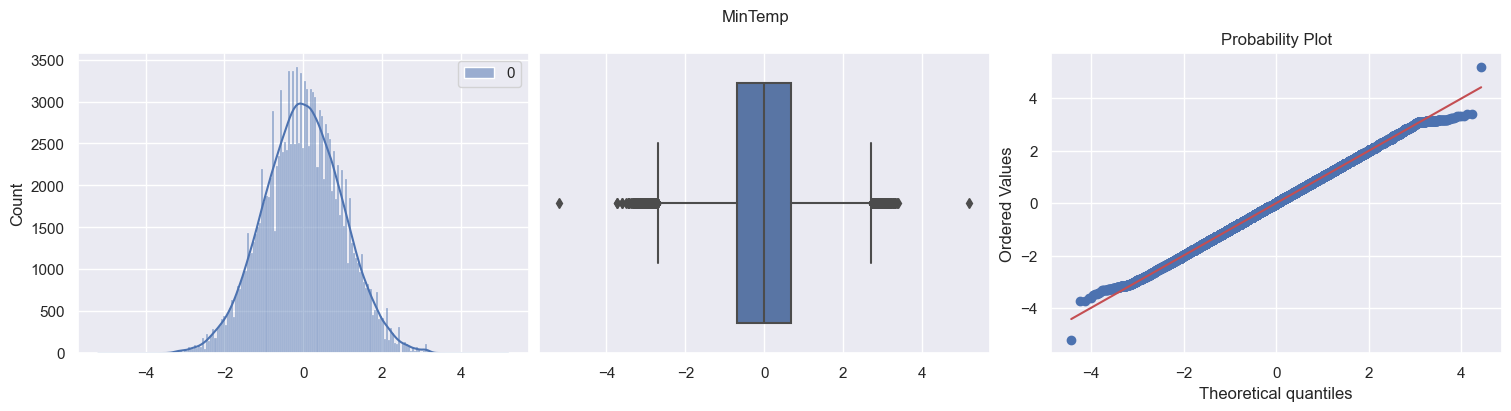

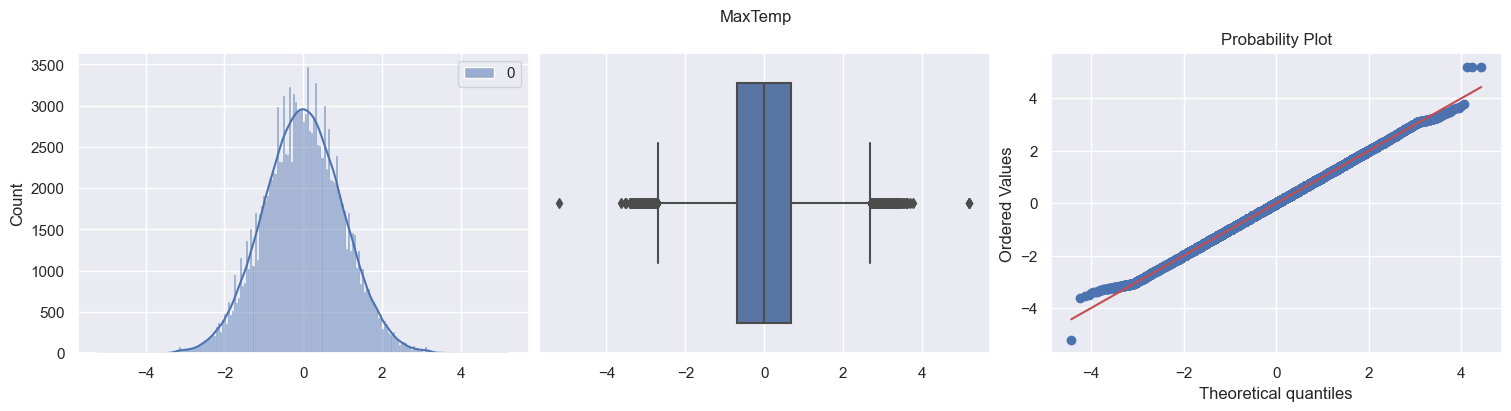

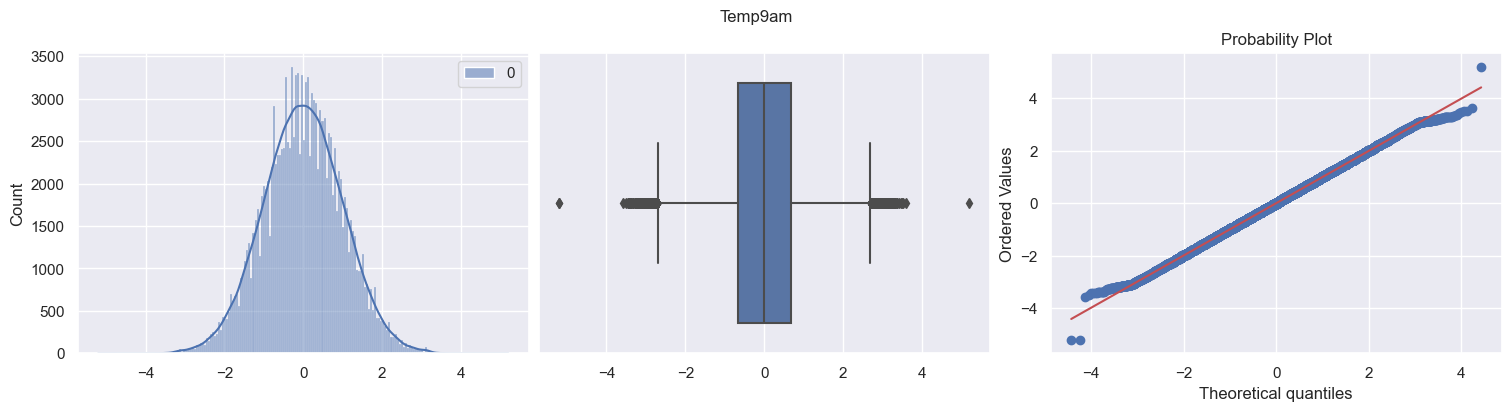

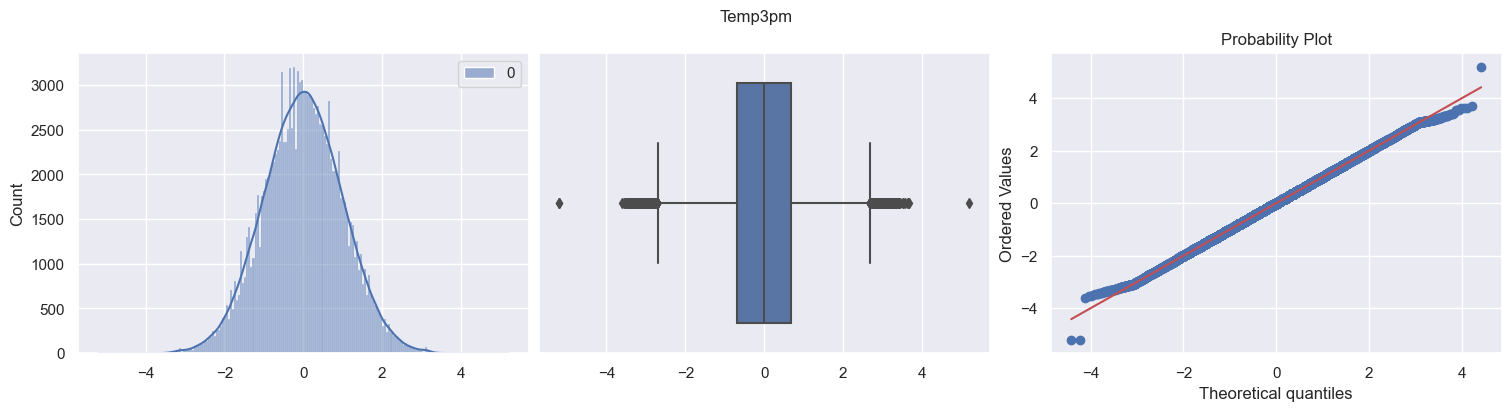

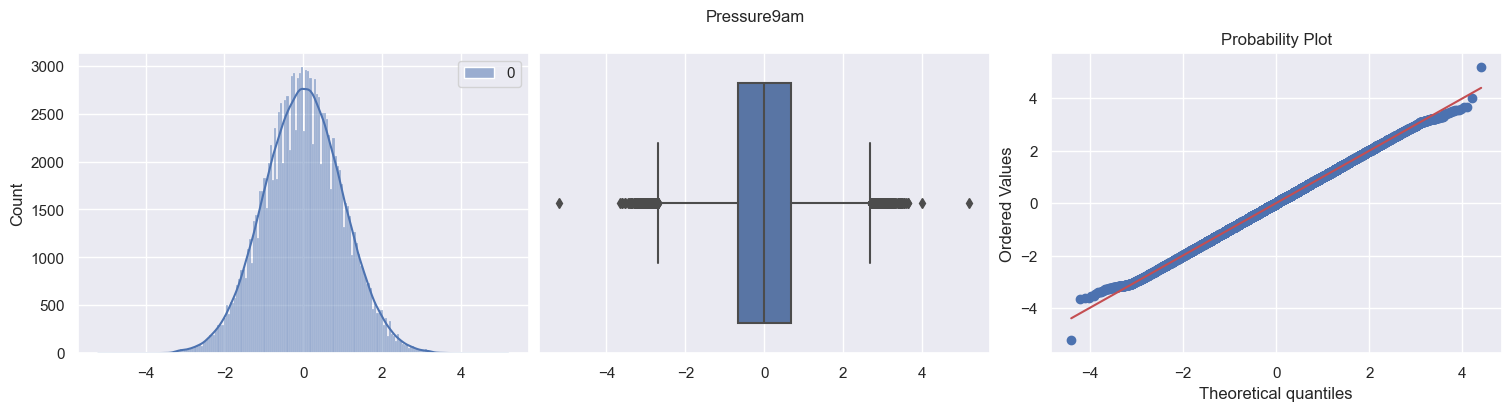

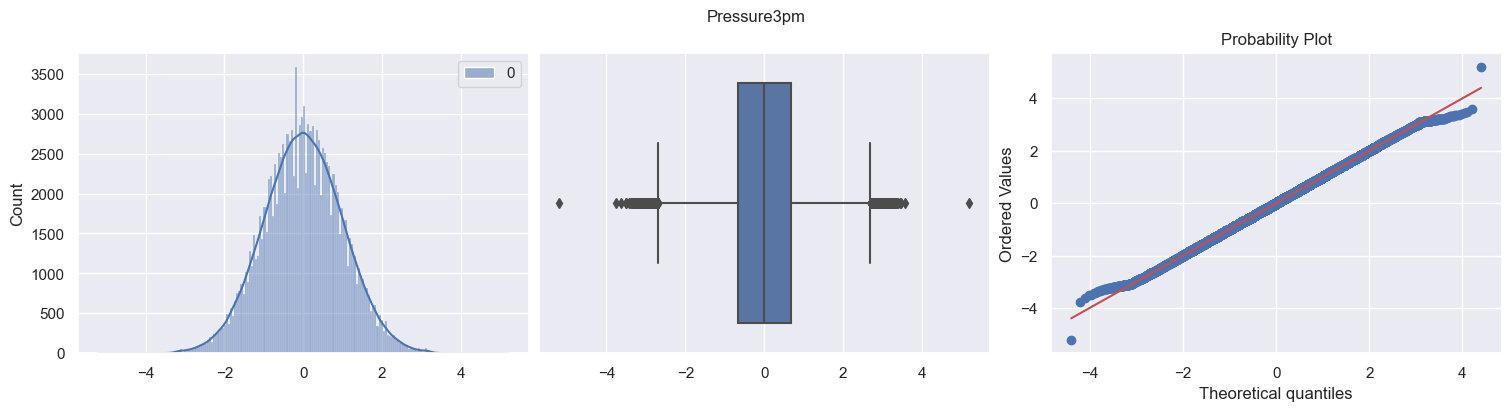

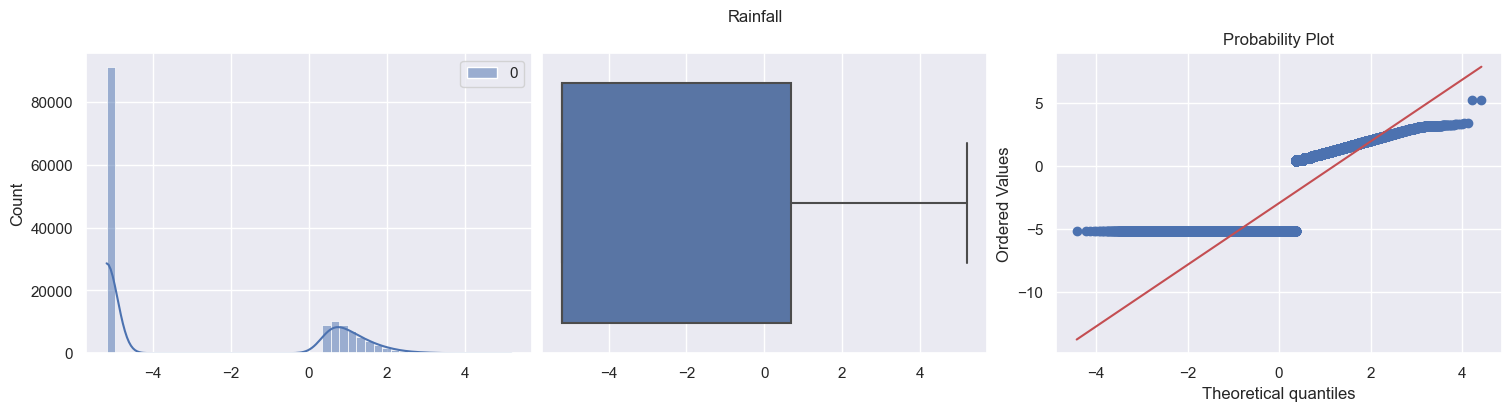

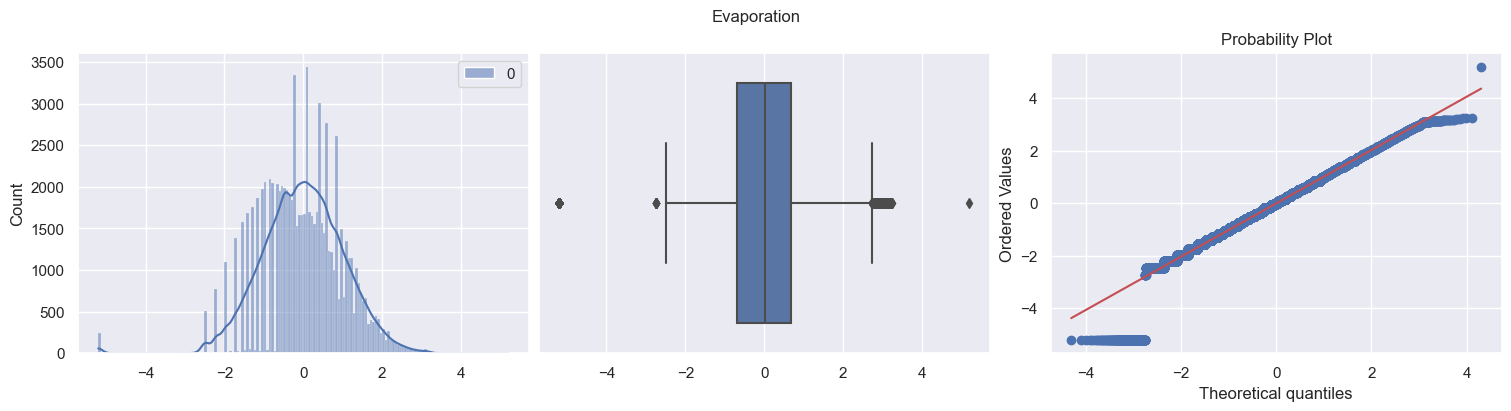

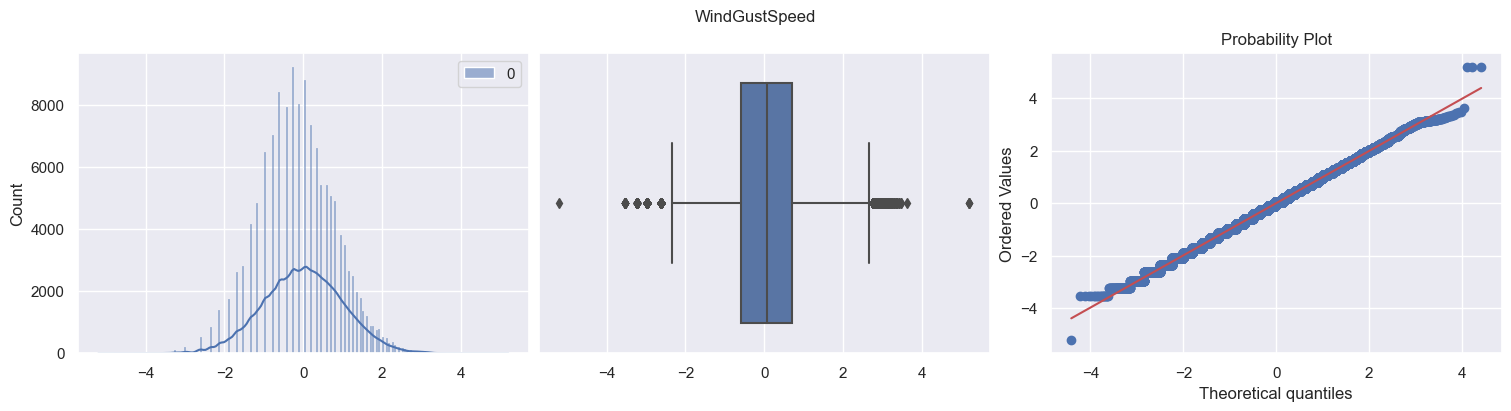

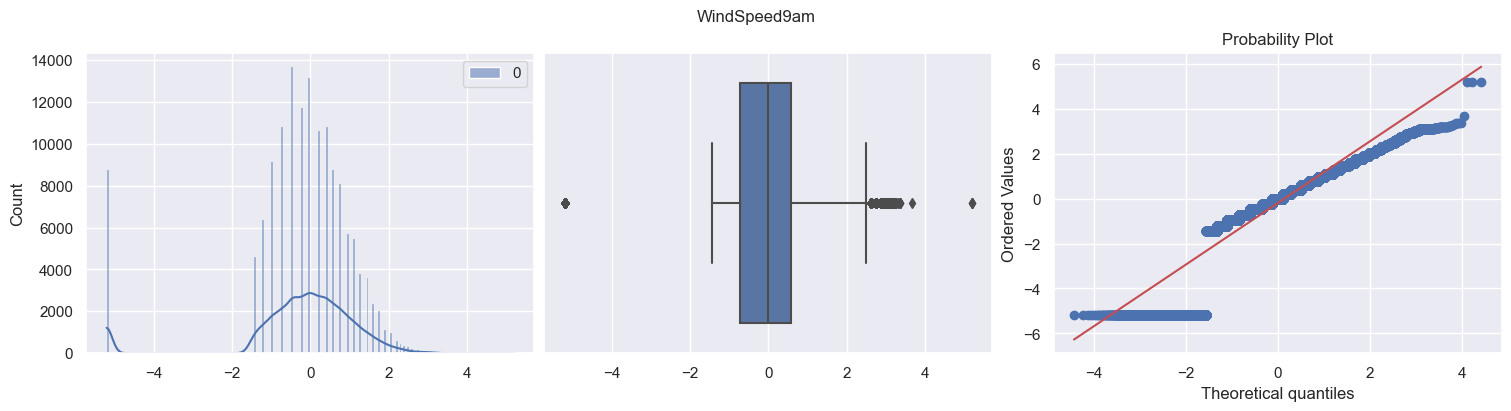

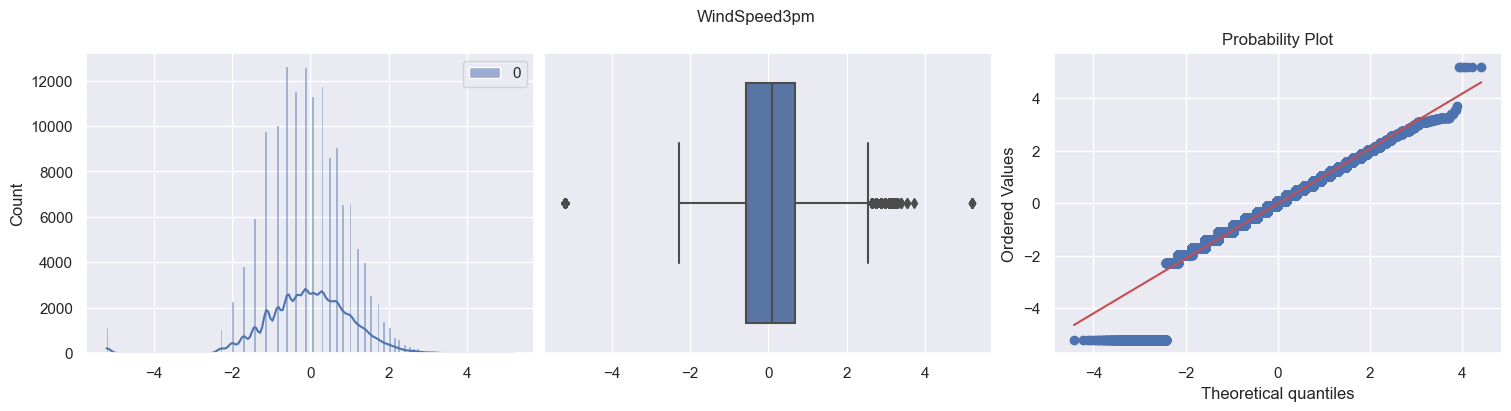

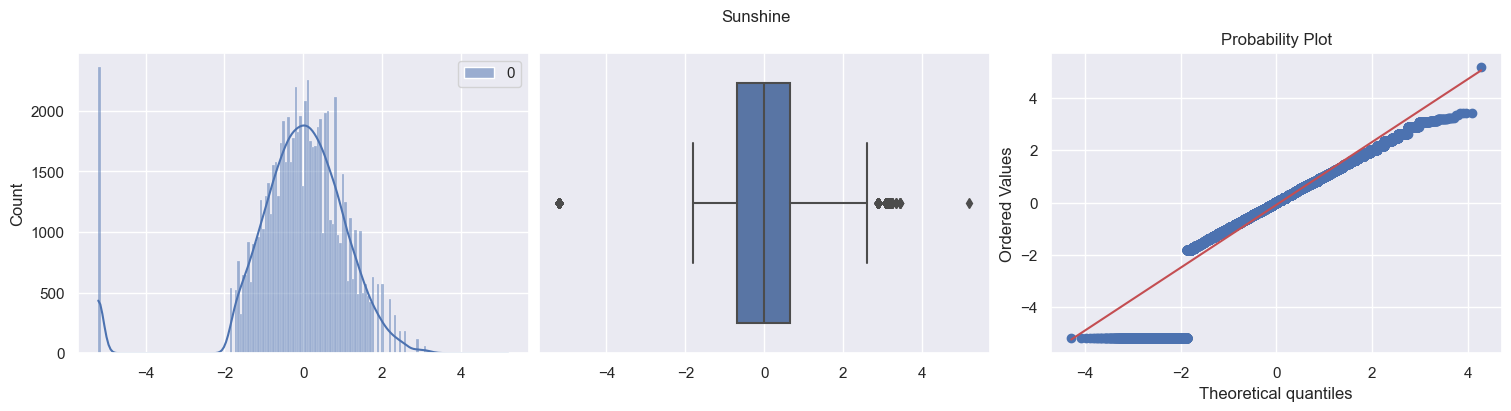

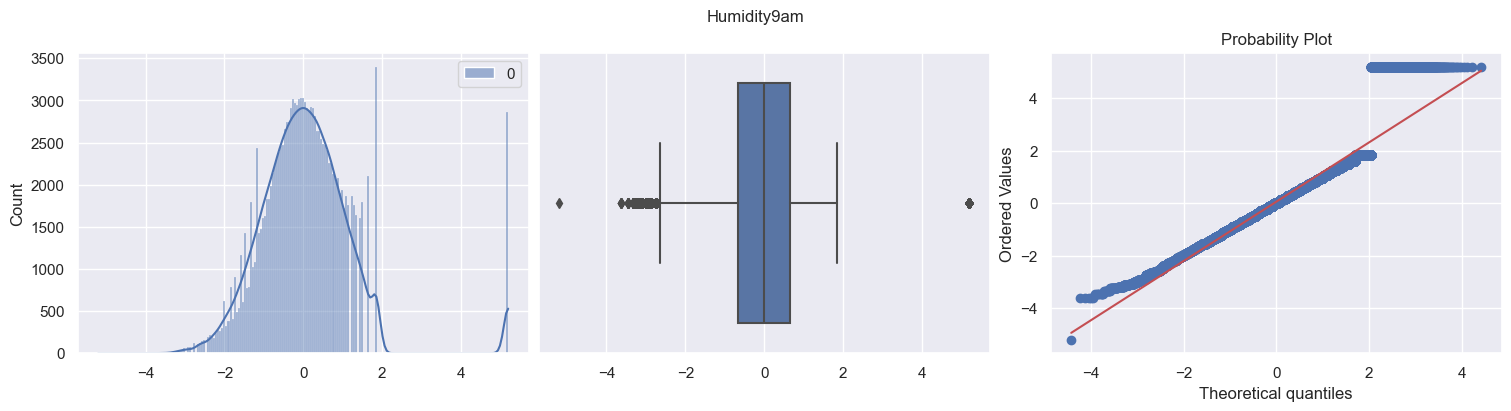

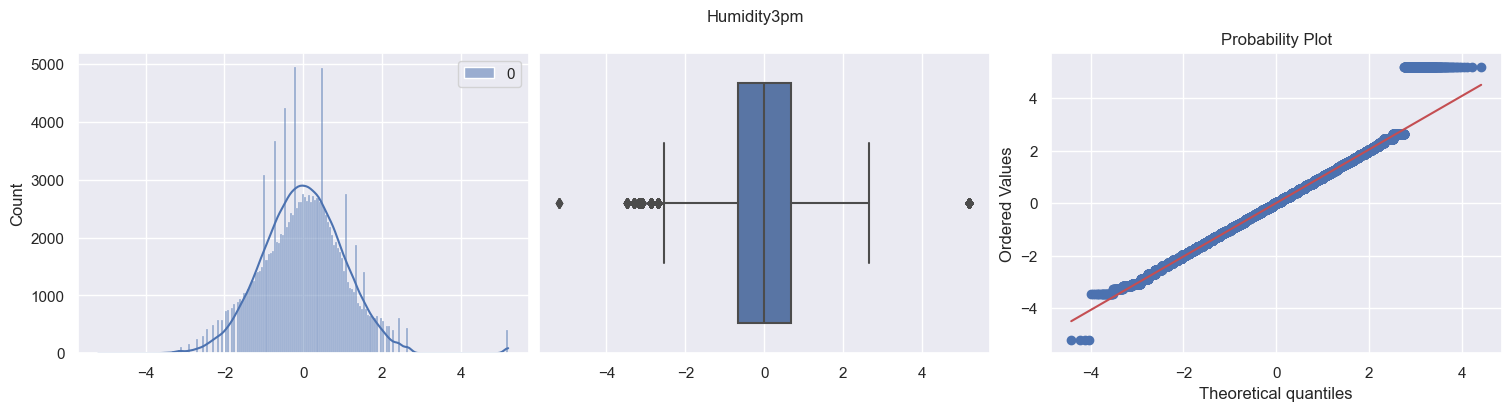

In [9]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Sunshine", "Humidity9am", "Humidity3pm"]
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)
display_dataset_distributions_transf (df, features, qt)

### PowerTransformer:

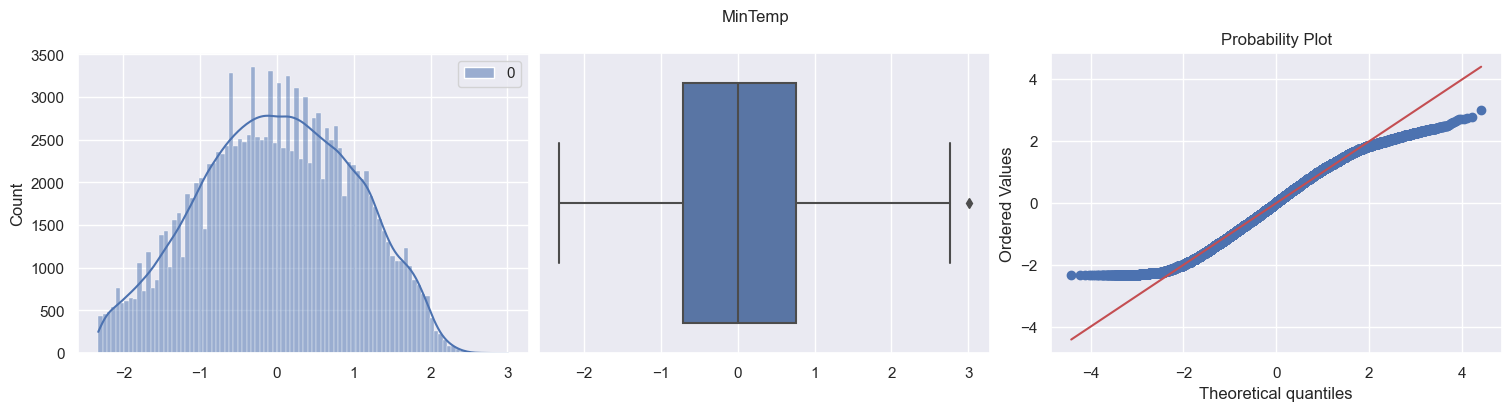

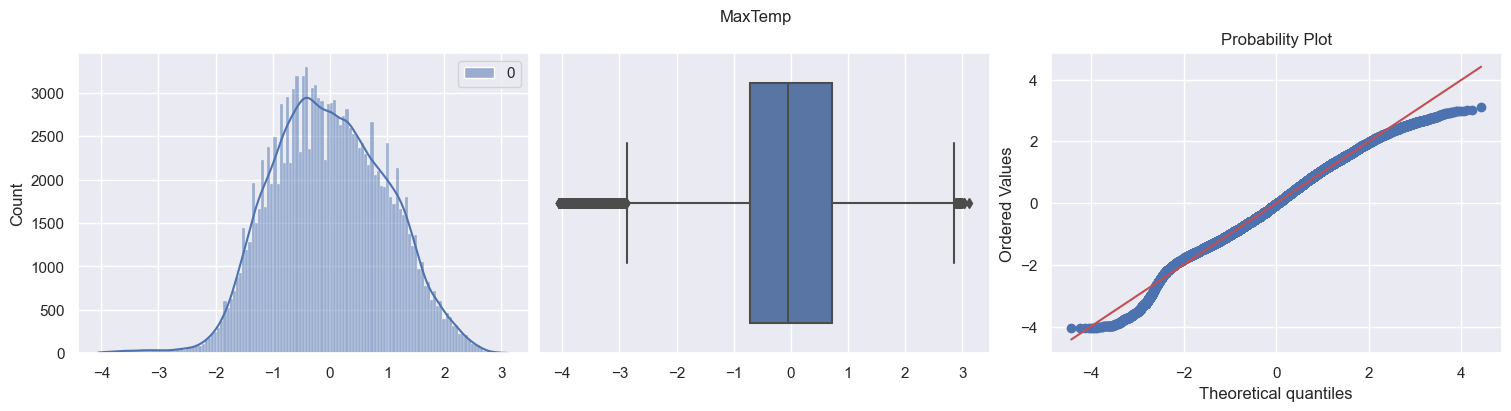

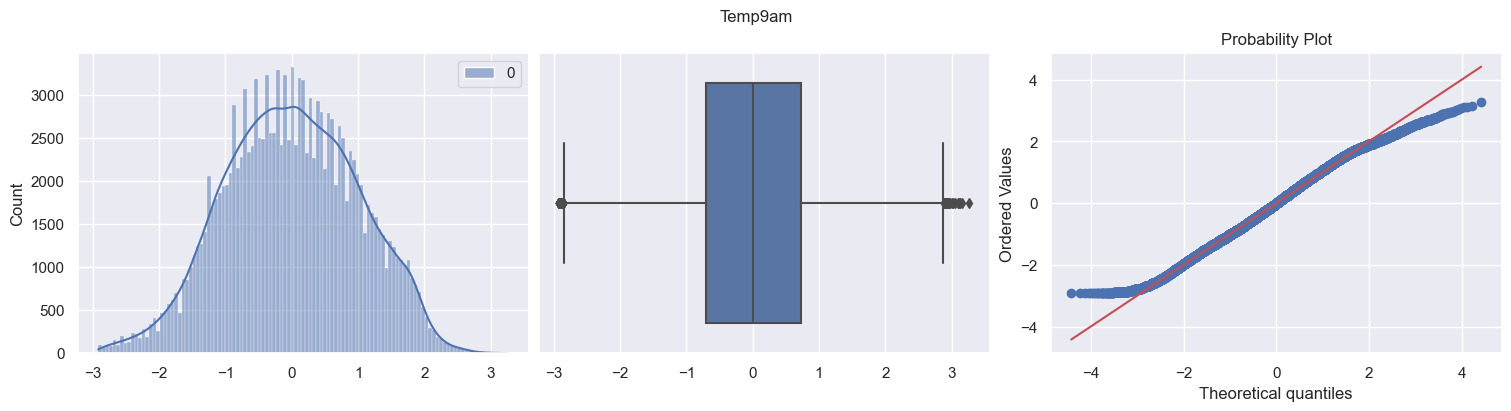

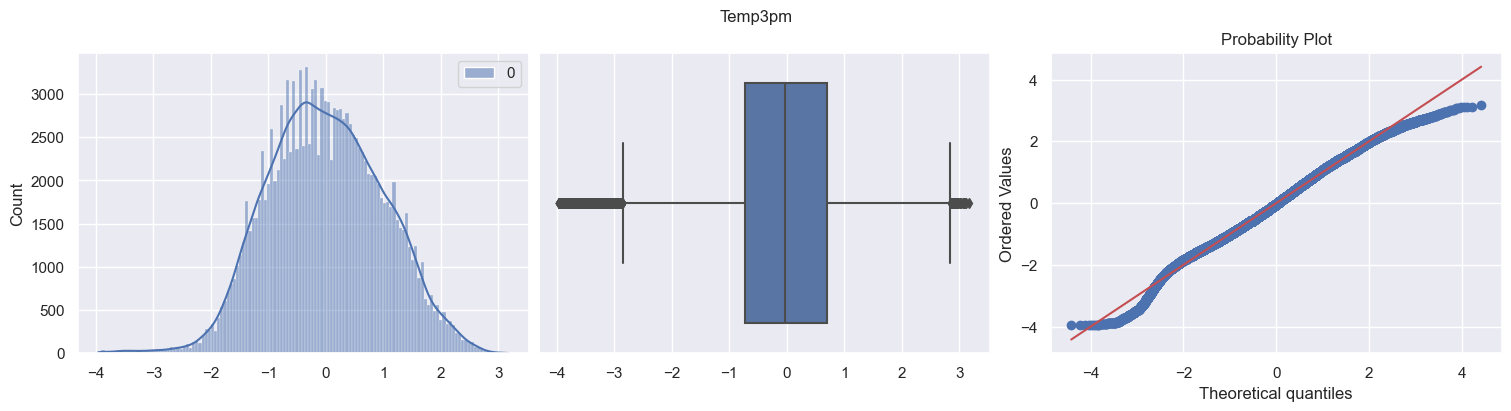

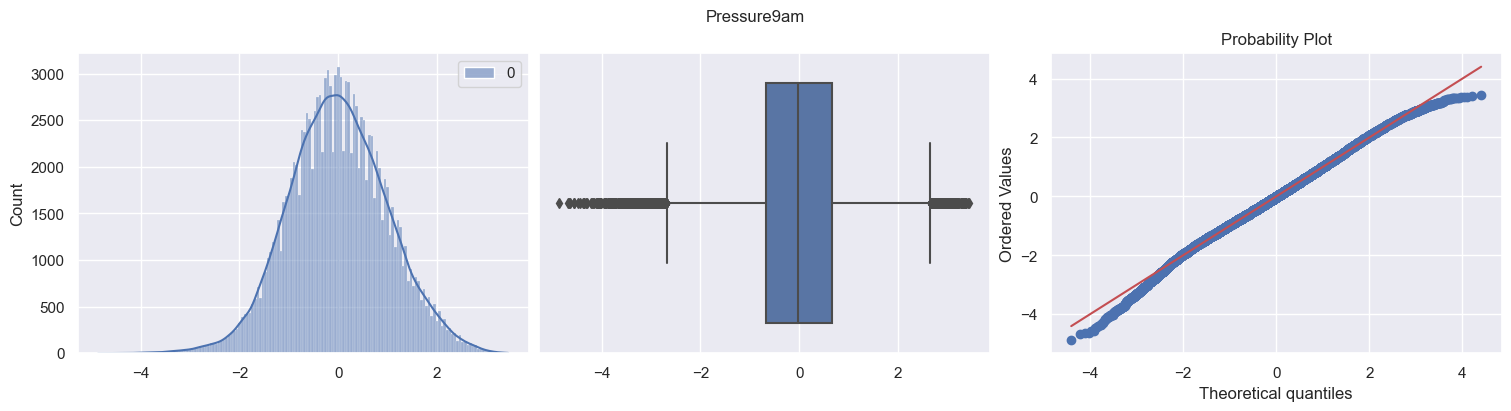

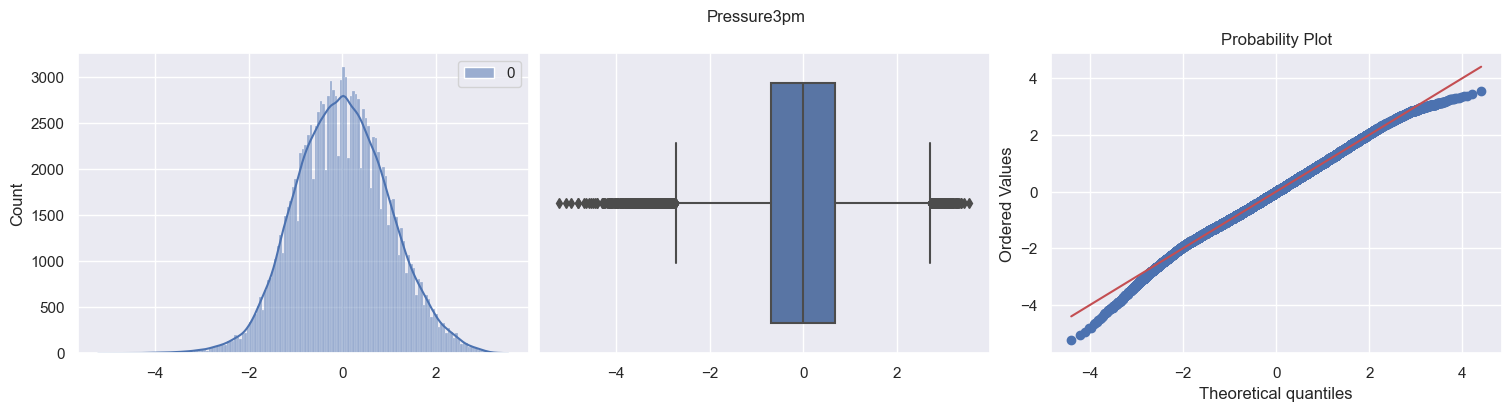

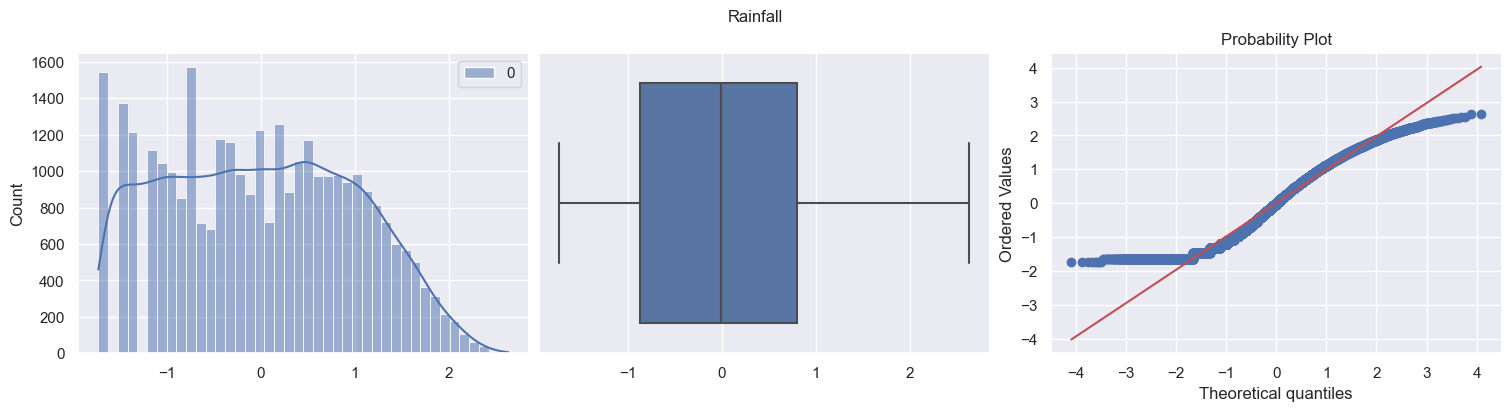

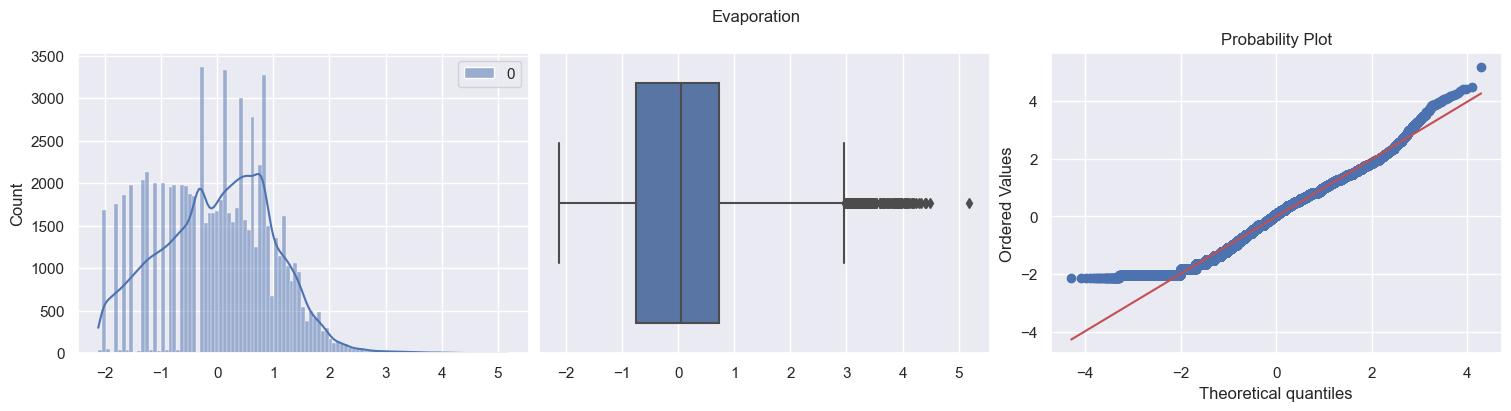

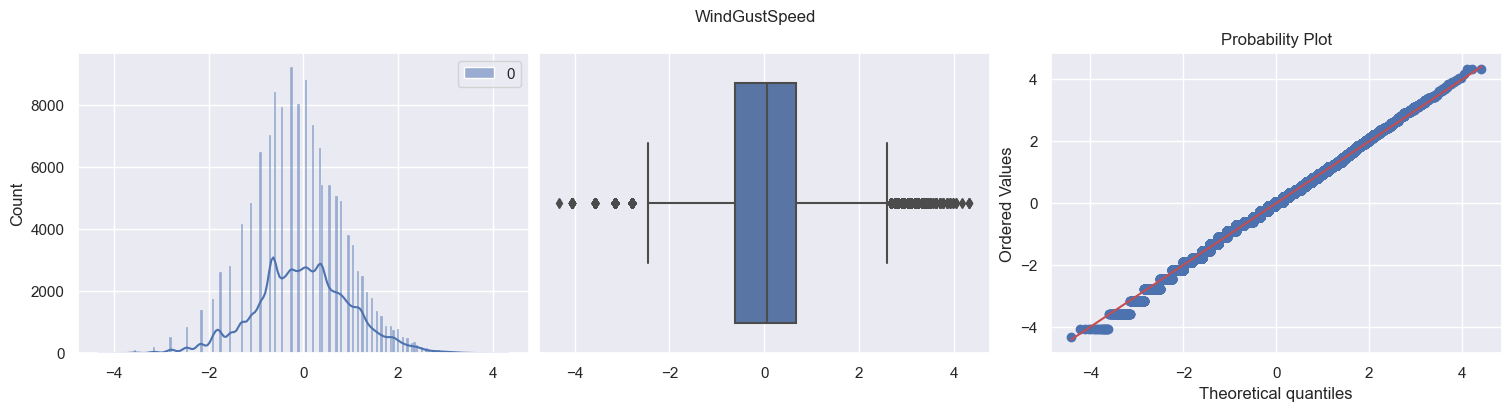

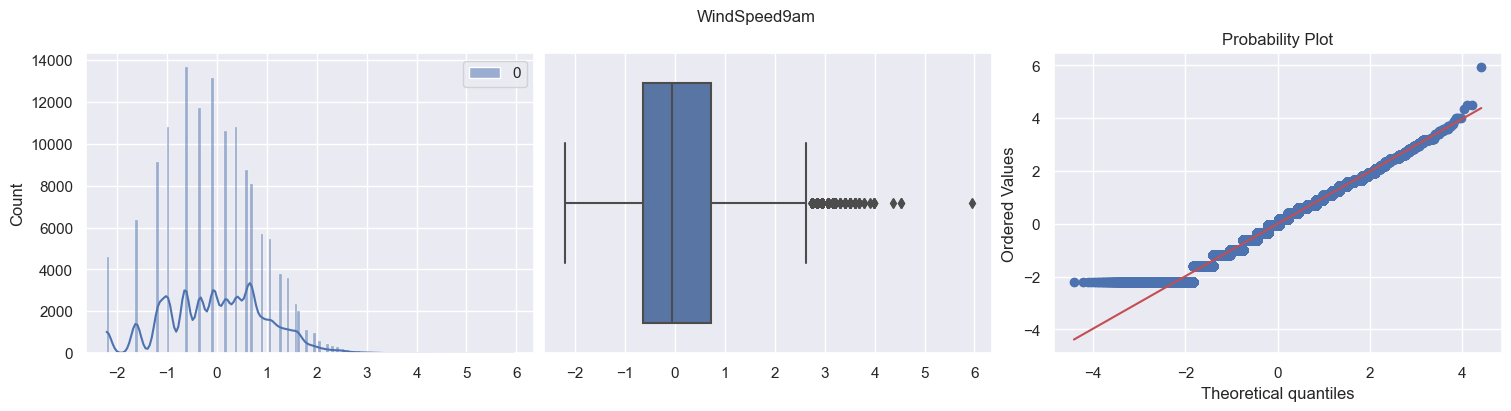

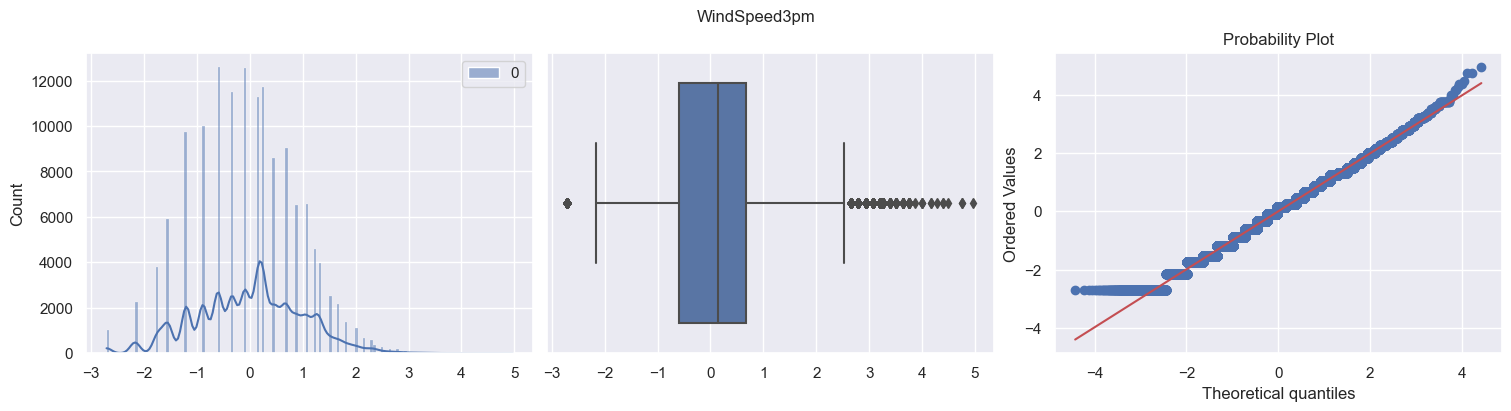

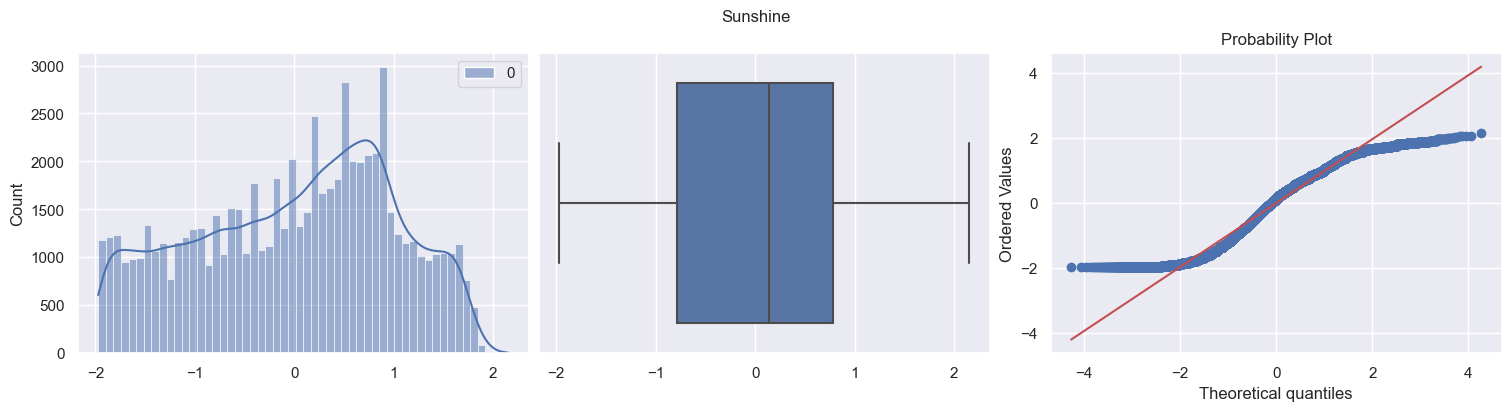

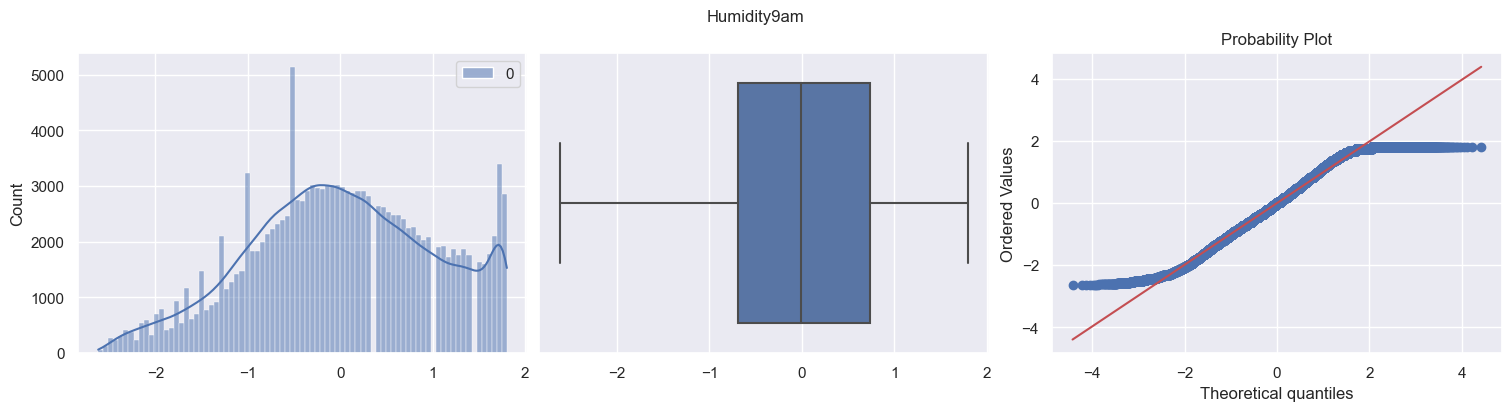

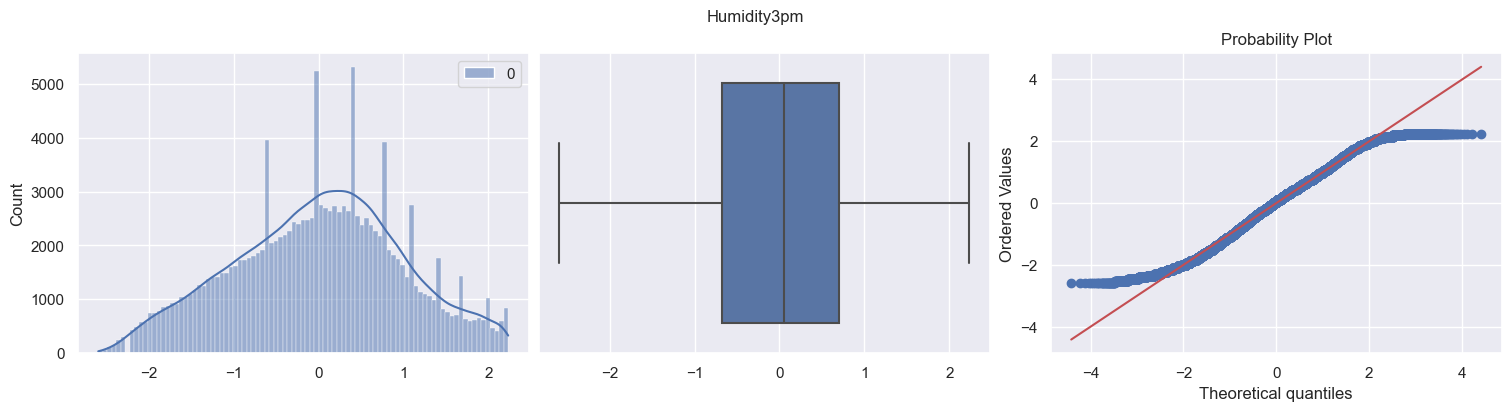

In [10]:
features =  ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Sunshine", "Humidity9am", "Humidity3pm"]
df_aux = df[df[features] >1 ]
pt = pt = PowerTransformer(method='yeo-johnson')
display_dataset_distributions_transf (df_aux, features, pt)

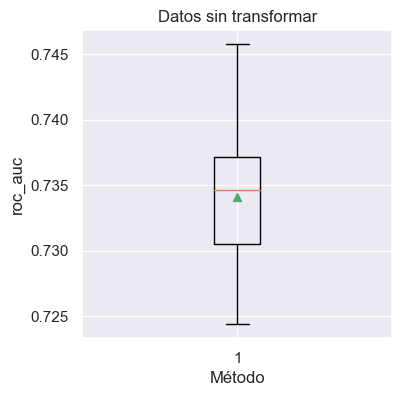

Valor medio:  0.7341068510110637


In [11]:
#Evaluamos el modelo simple transaformando:
df_aux = df.dropna()
scaler = StandardScaler()
y_train = df_aux["RainTomorrow"].map({'Yes':1, 'No':0})
X_train = df_aux.drop(['Date', 'RainTomorrow'], axis=1)

ct = ColumnTransformer([
#     ('scaler', scaler, make_column_selector(dtype_include=np.number)),
                    ('onehot', OneHotEncoder(handle_unknown='error'), make_column_selector(dtype_include=object))])

pipeline = Pipeline(steps=[('preprocessor', ct),
                          ( 'imputer' ,SimpleImputer()), 
                          ('logistic', LogisticRegression())
                     ])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, scoring= 'roc_auc' , cv=cv, n_jobs=-1)

fig,axes = plt.subplots(1,figsize=(4,4))
axes.boxplot(scores,showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("roc_auc")
axes.set_title("Datos sin transformar");
plt.show()
print ("Valor medio: ", scores.mean())

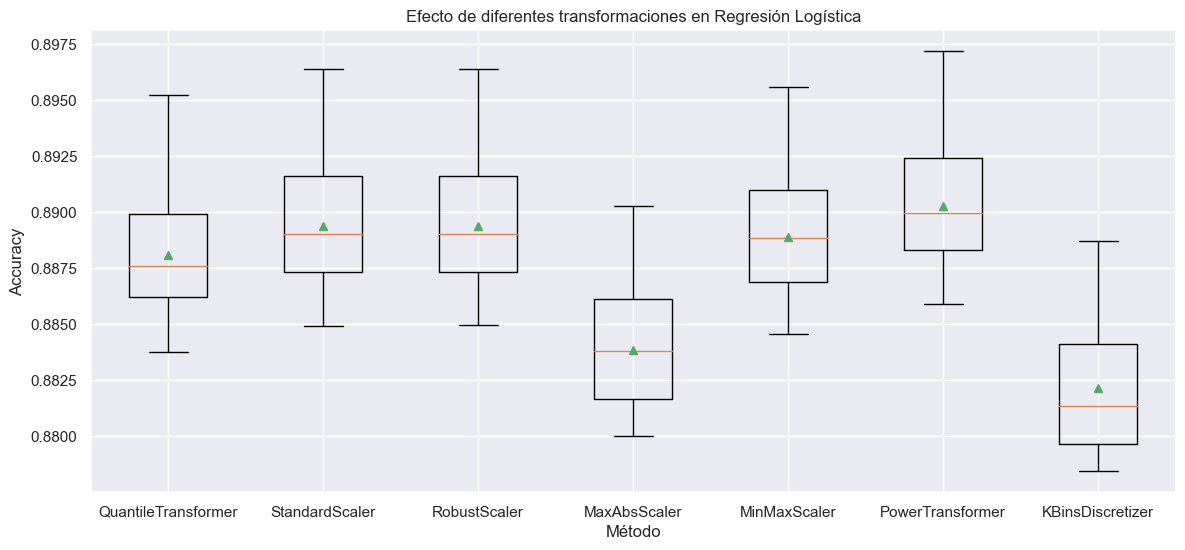

In [12]:
#Evaluamos el modelo simple transaformando:
df_aux = df.dropna()
y_train = df_aux["RainTomorrow"].map({'Yes':1, 'No':0})
X_train = df_aux.drop(['Date', 'RainTomorrow'], axis=1)

#Transformer:
qt = QuantileTransformer(output_distribution='normal')
ss = StandardScaler()
rs = RobustScaler()
ms = MaxAbsScaler()
mms = MinMaxScaler()
pt = PowerTransformer(method='yeo-johnson')
kb = KBinsDiscretizer()

modelos =[qt, ss, rs, ms, mms, pt,kb]
results = []
for trans in modelos:
    ct = ColumnTransformer([('scale', trans, make_column_selector(dtype_include=np.number)),
                        ('onehot', OneHotEncoder(handle_unknown='error'), make_column_selector(dtype_include=object))])

    pipeline = Pipeline(steps=[('preprocessor', ct),
                              ('logistic', LogisticRegression())
                         ])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, scoring= 'roc_auc' , cv=cv, n_jobs=-1)

    results.append(scores)
    
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=['QuantileTransformer', 'StandardScaler', 'RobustScaler', 'MaxAbsScaler', 'MinMaxScaler', 'PowerTransformer', 'KBinsDiscretizer',],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Efecto de diferentes transformaciones en Regresión Logística");
plt.show()

## Outliers:

In [5]:
def busco_outliers (df, features):
    df_outliers = pd.DataFrame({'feature': [], 'outliers_livianos': [], 'outliers_pesados': [], 'outliers_zscore':[], 'outliers_forest':[]})
    for col in features:
        
        #outliers z-score
        data_mean, data_std = np.mean(df[col]), np.std(df[col])
        cutoff = data_std*3
        lower,upper = data_mean-cutoff, data_mean+cutoff
        outliers_zscore = sum((df[col]<lower) | (df[col]>upper))
    

        
        #outliers iqr
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        limite_inferior = df[col].quantile(0.25) - (IQR * 1.5)
        limite_superior = df[col].quantile(0.75) + (IQR * 1.5)

        outliers_ligeros = sum((df[col] > limite_superior) | (df[col] < limite_inferior))
        limite_inferior = df[col].quantile(0.25) - (IQR * 3)
        limite_superior = df[col].quantile(0.75) + (IQR * 3)
        outliers_pesados = sum((df[col] > limite_superior) | (df[col] < limite_inferior))
    

    
        #outliers forest:
        clf = IsolationForest(n_estimators=10, warm_start=True)
        lof = LocalOutlierFactor()
        yhat = lof.fit_predict(df[~df[col].isnull()][col].to_numpy().reshape(-1,1)) 
        outliers_forest =  np.sum((yhat == -1))
    
        df_outliers = df_outliers.append({'feature': col, 'outliers_livianos': outliers_ligeros, 
                                          'outliers_pesados': outliers_pesados,
                                         'outliers_zscore': outliers_zscore,
                                          'outliers_forest':outliers_forest
                                         }, ignore_index=True)

    return df_outliers
  

In [6]:
features = ["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm"]
outliers = busco_outliers(df, features)
outliers

feature  outliers_livianos  outliers_pesados  outliers_zscore  \
0         MinTemp               54.0               0.0             19.0   
1         MaxTemp              489.0               0.0            331.0   
2         Temp9am              262.0               0.0            149.0   
3         Temp3pm              764.0               0.0            397.0   
4     Pressure9am             1191.0               8.0            503.0   
5     Pressure3pm              919.0               7.0            426.0   
6        Rainfall            25578.0           20762.0           2456.0   
7     Evaporation             1995.0             481.0            870.0   
8        Sunshine                0.0               0.0              0.0   
9   WindGustSpeed             3092.0             153.0           1368.0   
10   WindSpeed9am             1817.0             114.0           1362.0   
11   WindSpeed3pm             2523.0              82.0            958.0   
12    Humidity9am             1425.0               0.0            472.0   
13    Humidity3pm                0.0               0.0              0.0   

    outliers_forest  
0              41.0  
1             130.0  
2             101.0  
3              94.0  
4              94.0  
5             180.0  
6             329.0  
7             500.0  
8              22.0  
9              34.0  
10             16.0  
11             32.0  
12              1.0  
13              4.0

**Observaciones:**
* En general el analisis realizo por IQR tiende a penalizar más a los outliers.
* El análisis realizado utilizando la regla Z score penaliza mucha las variables que no poseen distribuciones parecidas a la normal (Railfall, Evaporation, WindGustSpeed,WindSpeed9am, WindSpeed3pm, Humidity9am).

## Correlación entre variables de entrada:

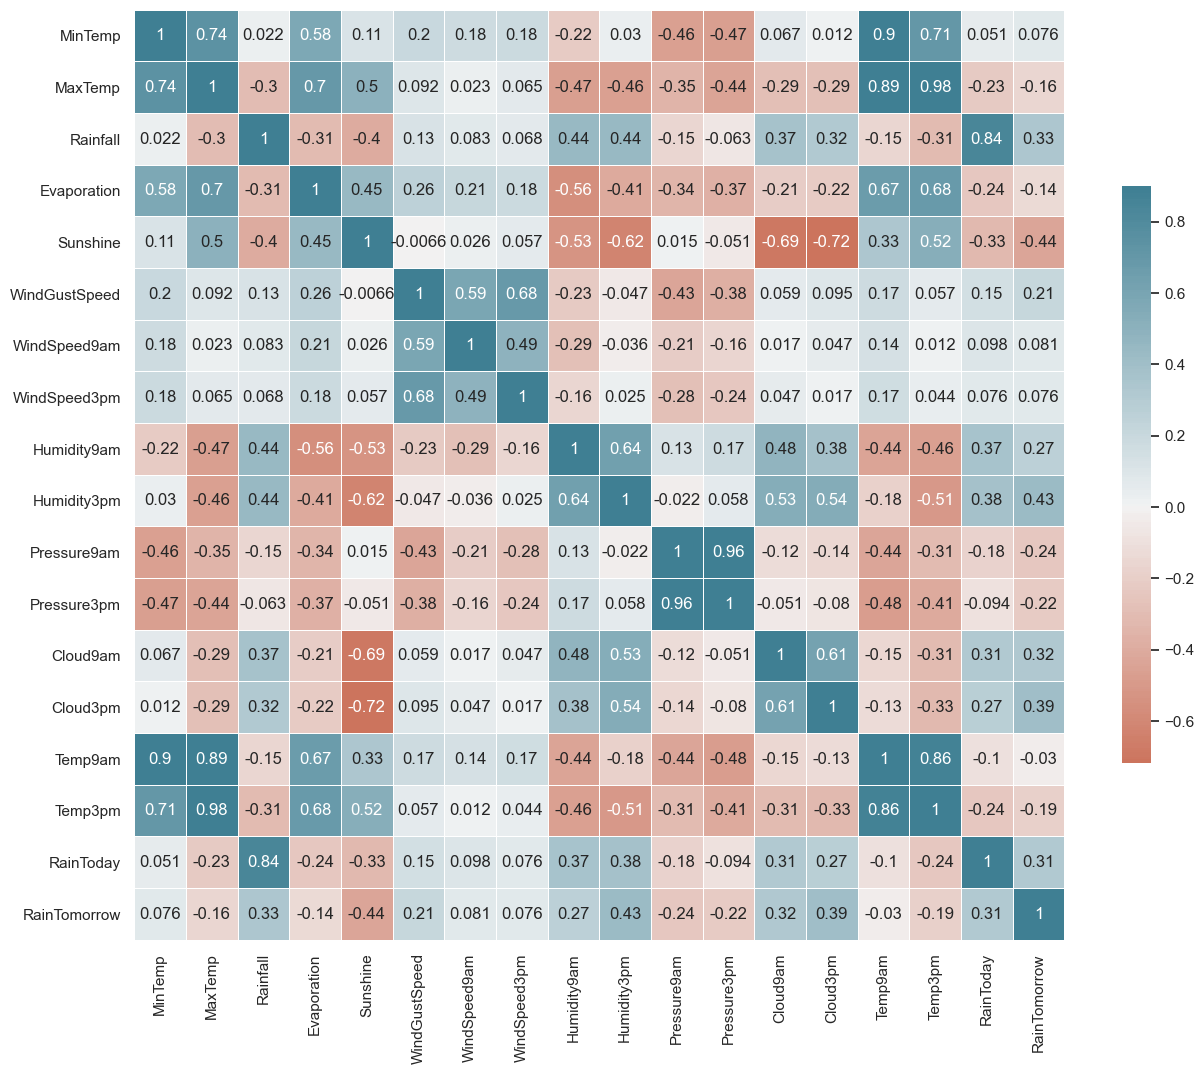

In [13]:
df_aux = pd.DataFrame.copy(df)
df_aux ['RainToday'] = df_aux['RainToday'].map({'Yes':1, 'No':0})
df_aux ['RainTomorrow'] = df_aux['RainTomorrow'].map({'Yes':1, 'No':0})
fig = plt.figure(figsize=(15,15))

sns.heatmap(df_aux.corr(method='spearman'), cmap=sns.diverging_palette(20, 220, n=200), vmax=.9, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.show()

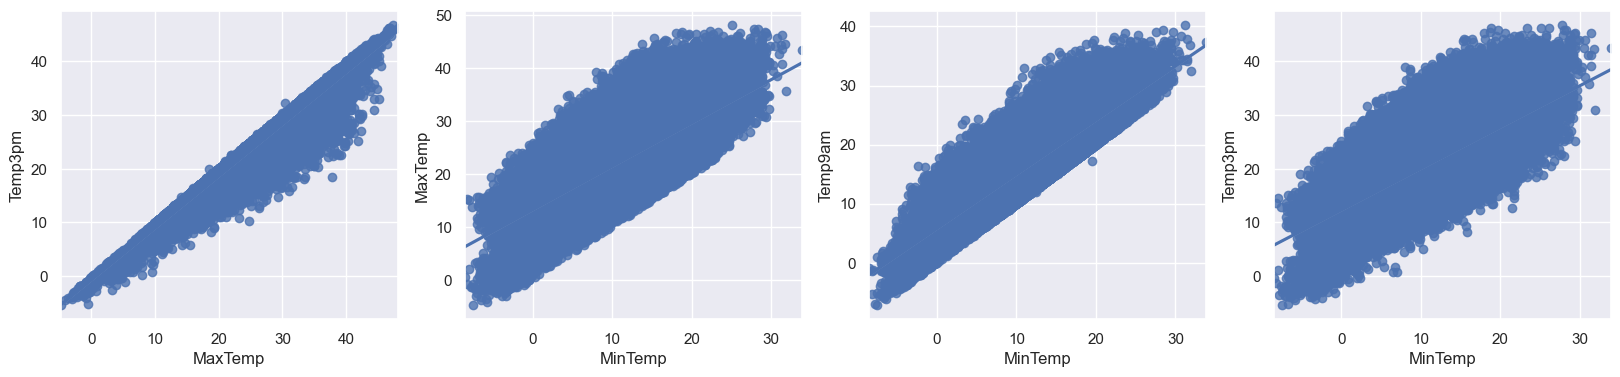

In [14]:
fig,axes = plt.subplots(1,4,figsize=(20,4))
sns.regplot(x="MaxTemp", y="Temp3pm", data=df, order=1,ax=axes[0])
sns.regplot(x="MinTemp", y="MaxTemp", data=df, order=1,ax=axes[1])
sns.regplot(x="MinTemp", y="Temp9am", data=df, order=1,ax=axes[2])
sns.regplot(x="MinTemp", y="Temp3pm", data=df, order=1,ax=axes[3])
plt.show()

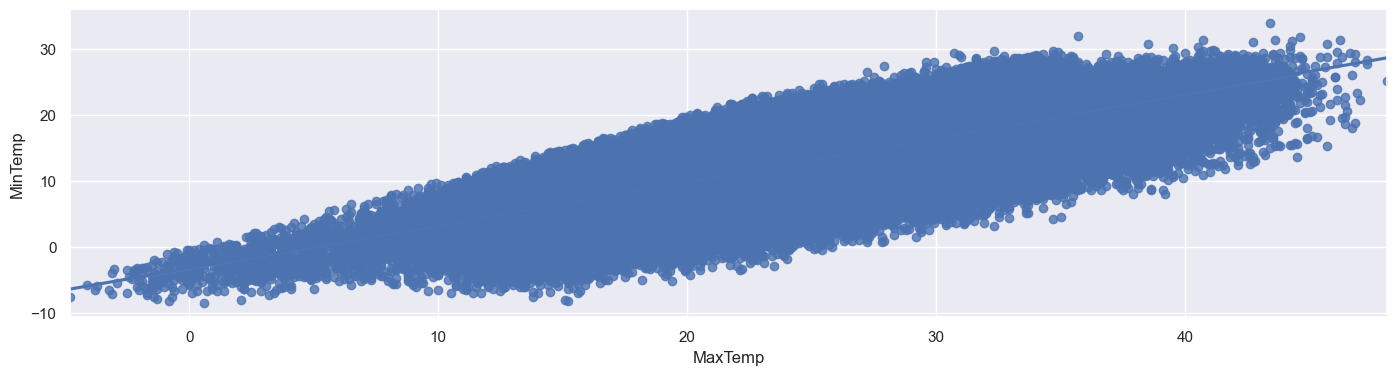

In [335]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="MinTemp", x="MaxTemp", data=df, order=1,ax=axes)
plt.show()

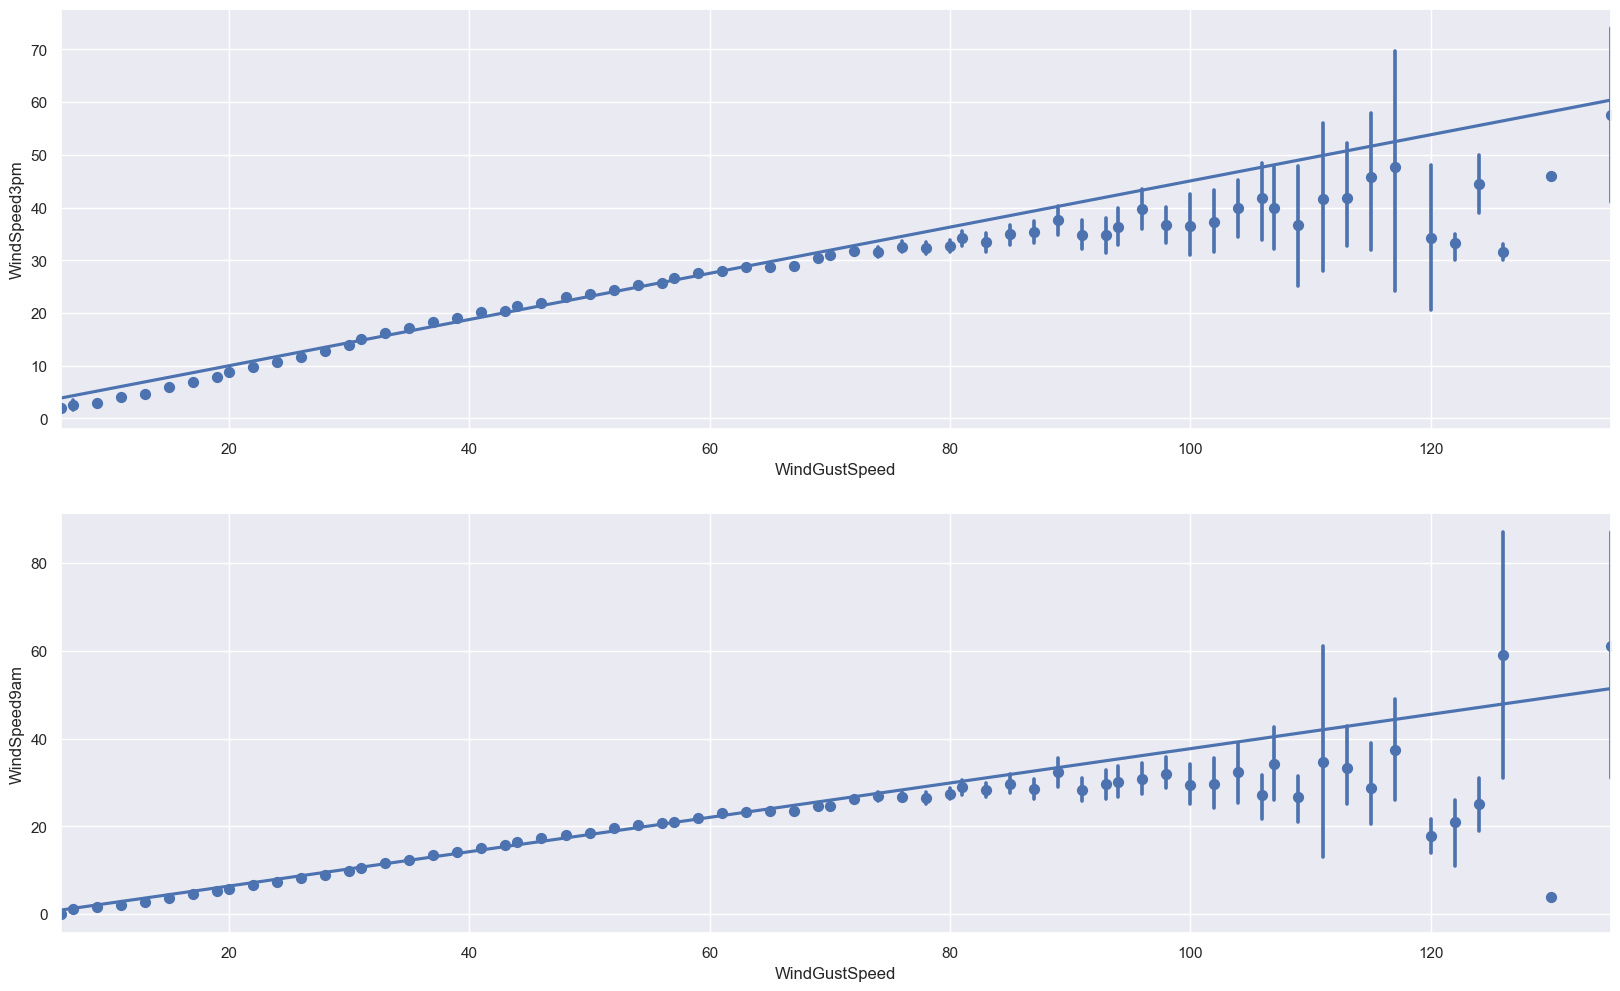

In [336]:
fig,axes = plt.subplots(2,1,figsize=(20,12))
sns.regplot(x="WindGustSpeed", y="WindSpeed3pm", data=df, order=1,ax=axes[0],x_estimator=np.mean)
sns.regplot(x="WindGustSpeed", y="WindSpeed9am", data=df, order=1,ax=axes[1],x_estimator=np.mean)
plt.show()

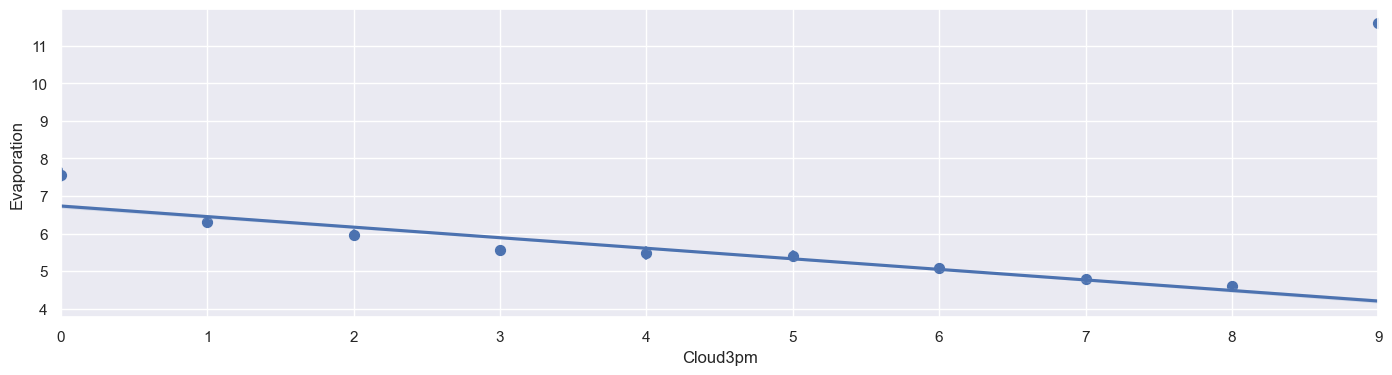

In [338]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Evaporation", x="Cloud3pm", data=df, order=1,ax=axes, x_estimator=np.mean)
plt.show()

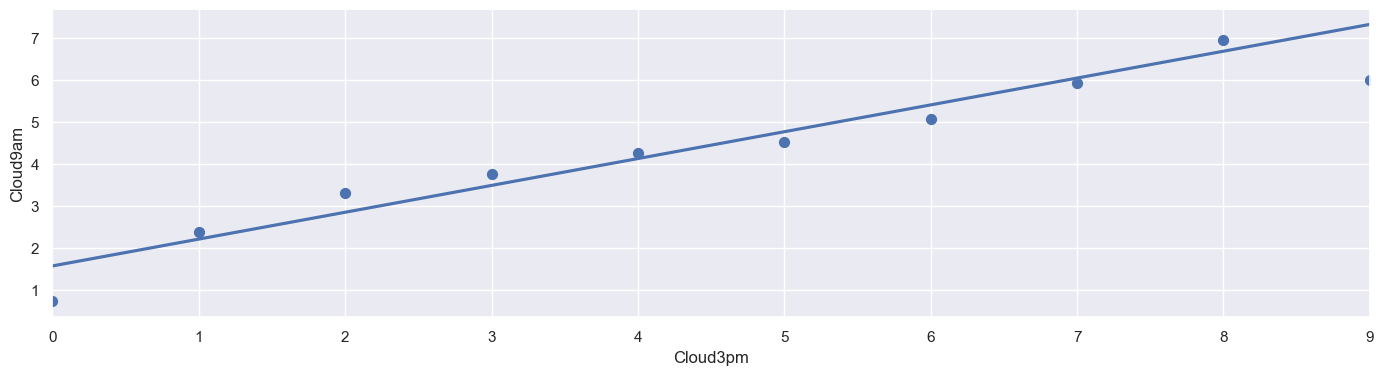

In [339]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Cloud9am", x="Cloud3pm", data=df, order=1,ax=axes, x_estimator=np.mean)
plt.show()

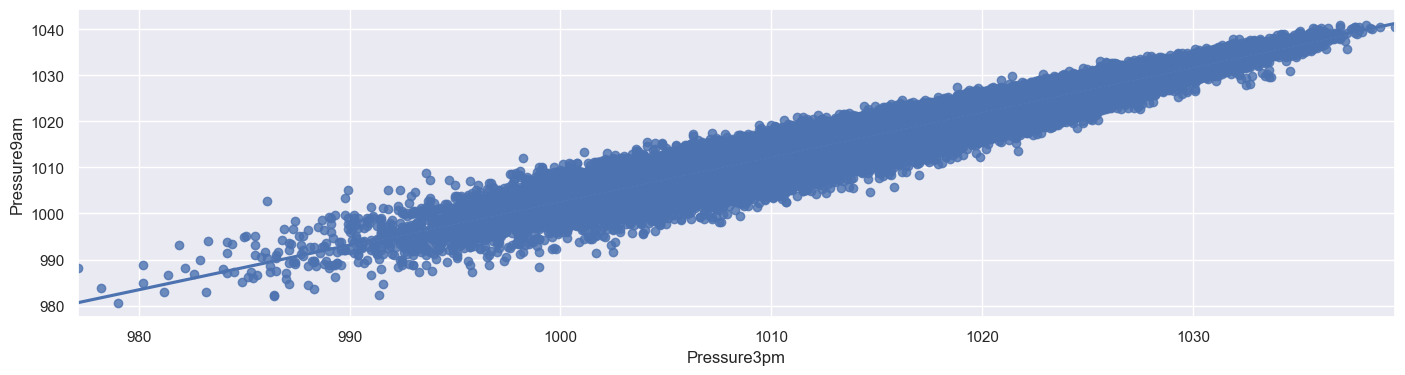

In [340]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Pressure9am", x="Pressure3pm", data=df, order=1,ax=axes)
plt.show()

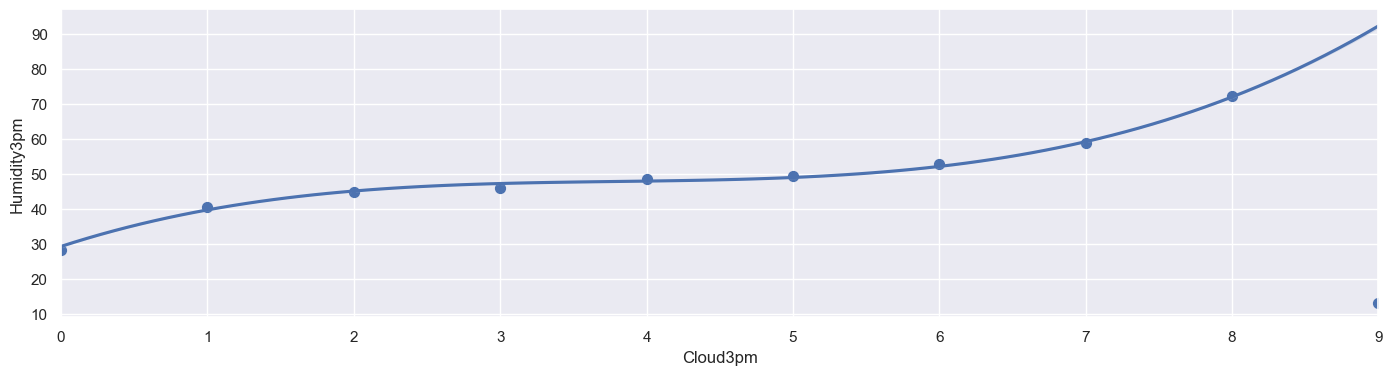

In [348]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Humidity3pm", x="Cloud3pm", data=df, order=3,ax=axes, x_estimator=np.mean)
plt.show()

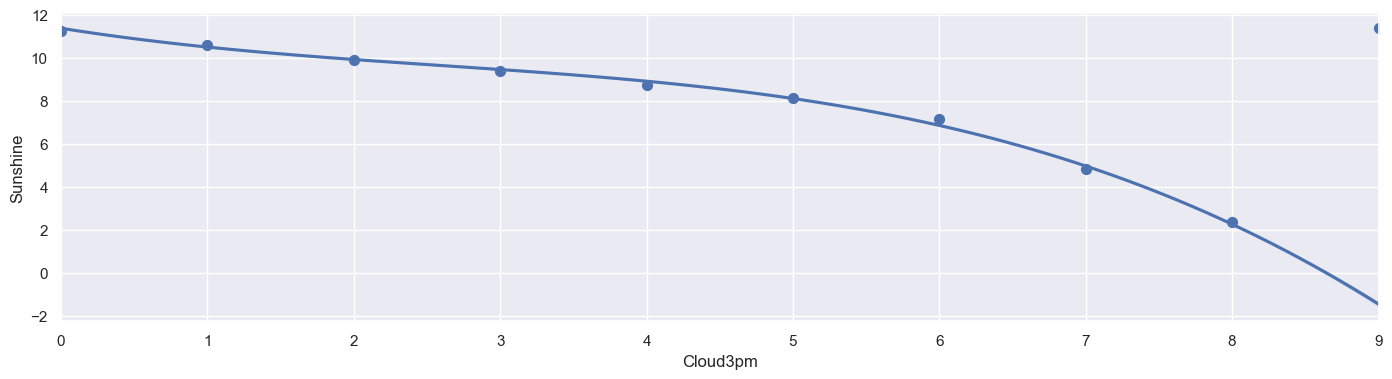

In [349]:
fig,axes = plt.subplots(figsize=(17,4))
sns.regplot(y="Sunshine", x="Cloud3pm", data=df, order=3,ax=axes, x_estimator=np.mean)
plt.show()

In [351]:
df[df.Cloud3pm==9]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
106933 2012-11-02  Woomera     10.6     24.6       0.2         11.6      11.4   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
106933         SSE           39.0         SE  ...        45.0         13.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
106933       1019.0       1015.2       6.0       9.0     14.8     23.7   

        RainToday  RainTomorrow  
106933         No            No  

[1 rows x 23 columns]

**Observaciones:**
* Existe una fuerte correlación entre las variables MinTemp, MaxTemp, Temp9am, Temp3pm.
* Existe una fuerte correlación entre las variables WindGustSpeed, WindSpeed3pm y WindSpeed9am.
* Existe una fuerte correlación entre las variables Sunshine y las variables Humidity3pm y Humidity9am.
* Existe una fuerte correlación entre las variables Sunshine y las variables Cloud9am y Cloud3pm.
* Existe una fuerte correlación entre las variables Cloud9am y Cloud3pm.
* Existe una fuerte correlación entre las variables Pressure9am y Pressure3pm.
* Existe una relación monotomica entre la variables Humedad y Cloud3pm

## Variables categóricas de entrada:
* Date           
* Location       
* WindGustDir
* WindDir9am 
* WindDir3pm    
* Cloud9am    
* Cloud3pm
* RainToday  
* RainTomorrow

In [352]:
# Analizamos las variables categoricas:
df.describe(include='object')

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
count     145460      135134     134894     141232    142199       142193
unique        49          16         16         16         2            2
top     Canberra           W          N         SE        No           No
freq        3436        9915      11758      10838    110319       110316

In [353]:
print(df.Location.unique())
print("Cardinalidad: ", len(df.Location.unique()))

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Cardinalidad:  49


In [354]:
print(df.WindGustDir.unique())
print("Cardinalidad: ", len(df.WindGustDir.unique()))

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Cardinalidad:  17


In [355]:
print(df.WindDir9am.unique())
print("Cardinalidad: ", len(df.WindDir9am.unique()))

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Cardinalidad:  17


In [356]:
print(df.WindDir3pm.unique())
print("Cardinalidad: ", len(df.WindDir3pm.unique()))

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Cardinalidad:  17


In [357]:
print(df.Cloud9am.unique())
print("Cardinalidad: ", len(df.Cloud9am.unique()))

[ 8. nan  7.  1.  0.  5.  4.  2.  6.  3.  9.]
Cardinalidad:  11


In [358]:
print(df.Cloud3pm.unique())
print("Cardinalidad: ", len(df.Cloud3pm.unique()))

[nan  2.  8.  7.  1.  5.  4.  6.  3.  0.  9.]
Cardinalidad:  11


In [359]:
print(df.RainToday.unique())
print("Cardinalidad: ", len(df.RainToday.unique()))

['No' 'Yes' nan]
Cardinalidad:  3


In [360]:
print(df.RainTomorrow.unique())
print("Cardinalidad: ", len(df.RainTomorrow.unique()))

['No' 'Yes' nan]
Cardinalidad:  3


**Observaciones:**
* Existen presentes 8 variables categoricas.
* 6 de las 8 variables son nominales.
* Las variables Cloud9am y Cloud3pm son ordinales.
* La variable Location posee 49 categorías e identifican nombres puntos de locación en la cual se realizaron las mediciones.
* Las variables WindGustDir, WindDir3pm y WindDir9am  poseen 17 categorías las cuales son iguales las cuales son códigos que describen puntos cardinales de dirección del viento.
* Las variables Cloud9am y Cloud3pm poseen 10 categorías.
* La variable RainToday y RainTomorrow poseen dos categorías.
* La variable RainTomorrow es la variable de salida u objetivo.

### Date:

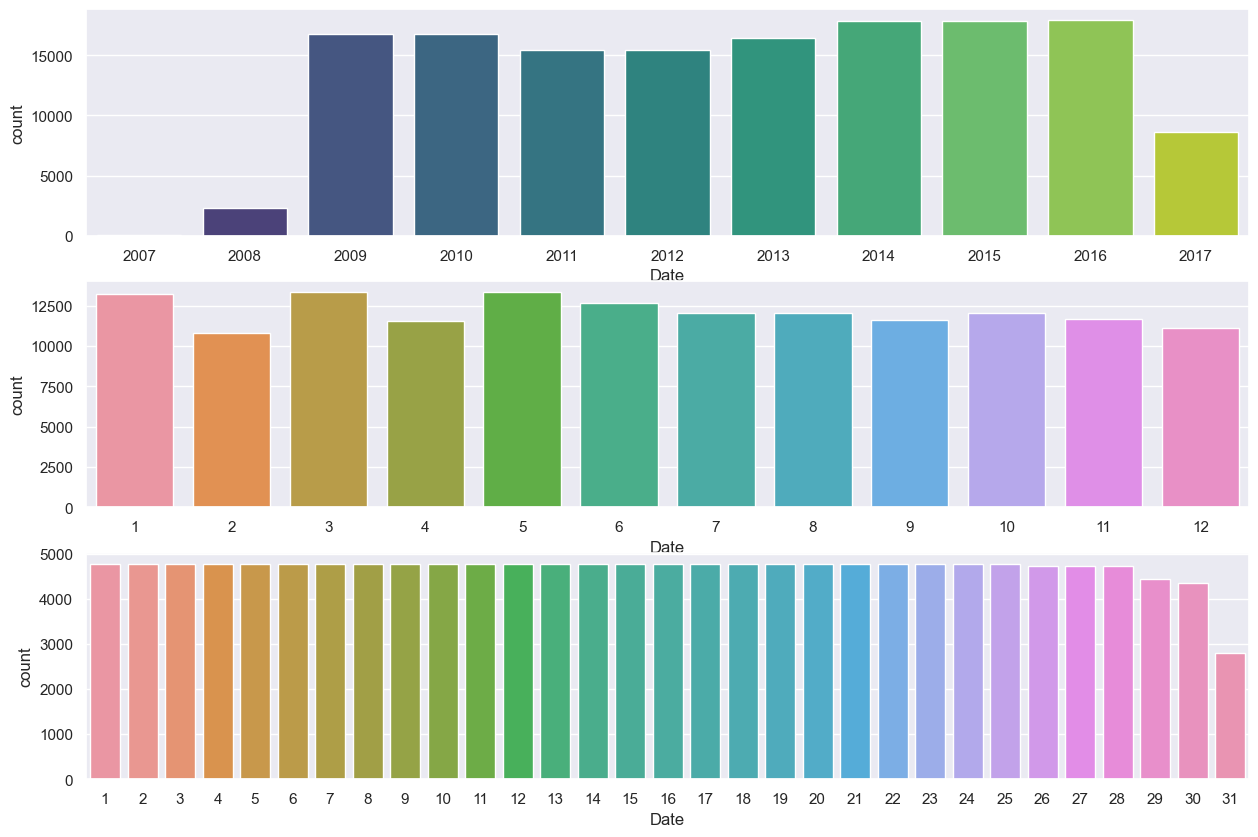

In [361]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
sns.countplot(ax=axes[0], x=pd.to_datetime(df.Date).dt.year, palette="viridis")
sns.countplot(ax=axes[1], x=pd.to_datetime(df.Date).dt.month)
sns.countplot(ax=axes[2], x=pd.to_datetime(df.Date).dt.day)
plt.show()

**Observaciones:**
* La variable Date la podemos descomponer en año, mes y día, es muy probable que solo nos interese estudiar solo la probabilidad de lluvia en cada uno de los meses.
* La distribución de datos de los años es bastante uniforme, salvo por el los dos primeros y el ultimo año que hay menos datos.
* La distribución del datos en los meses y días es uniforme.
* La variable Date nos puede traer un problema de alta cardinalidad, debemos evaluar la influencia del año y el mes para poder determinar si conviene o no incluir de forma separa mes y año.

### Location:

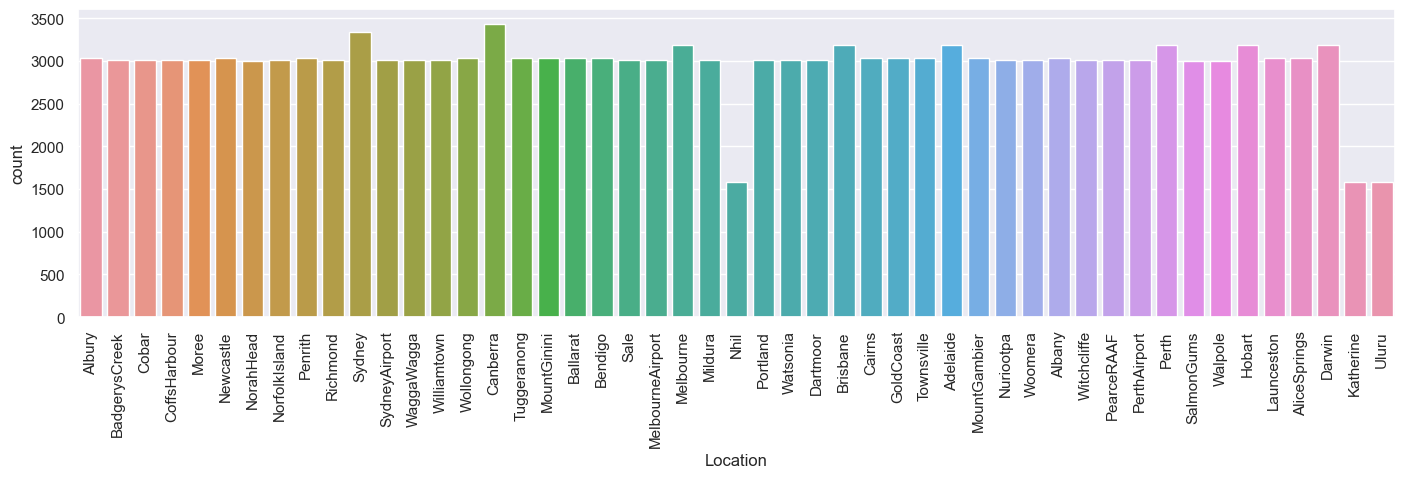

In [362]:
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.countplot(x=df['Location'])
plt.show()

**Observaciones:**
* La variable Location posee 49 categorias. Esta variable presenta una cardinalidad alta.
* Se observa que la distribución de los datos es uniforme para todas las locaciones.

### Dirección de viento:

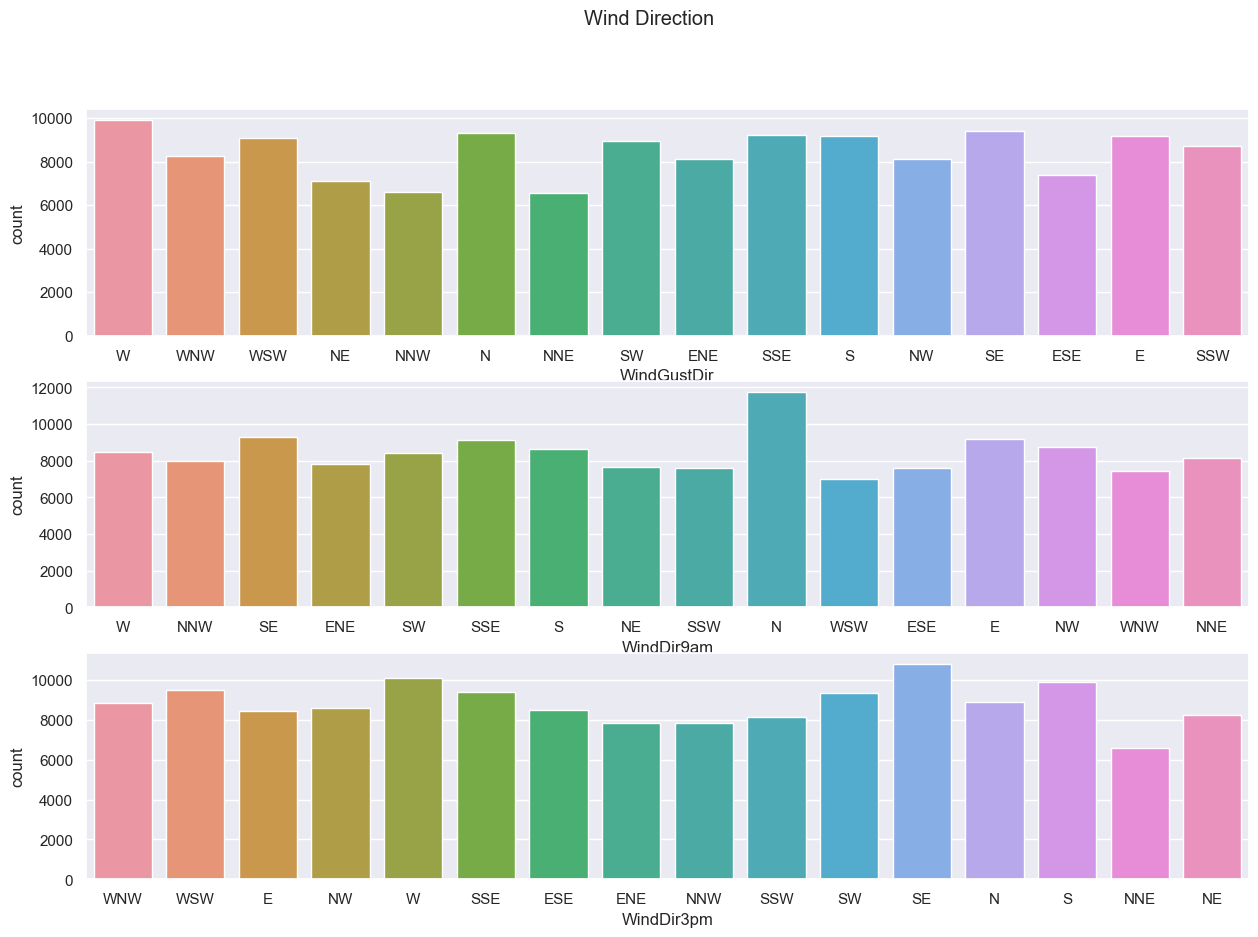

In [363]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Wind Direction')
sns.countplot(ax=axes[0], x=df['WindGustDir'])
sns.countplot(ax=axes[1], x=df['WindDir9am'])
sns.countplot(ax=axes[2], x=df['WindDir3pm'])
plt.show()

**Observaciones:**
* Las variables de dirección del viento poseen 17 categorias que representan diferentes direcciones en el sistema de coordenadas cartesiano, podemos pensar en agrupar estas 17 variables en solo 4 principales (N, S, E, W).

### Cloud:
La variable Cloud solo posee 10 categorias correspondientes a la escala Octa utilizada para medir la nubosidad, en la cual 0 representa totalmente despejado y 9 totalmente nublado:

* 0 oktas represents the complete absence of cloud
* 1 okta represents a cloud amount of 1 eighth or less, but not zero
* 7 oktas represents a cloud amount of 7 eighths or more, but not full cloud cover
* 8 oktas represents full cloud cover with no breaks
* 9 oktas represents sky obscured by fog or other meteorological phenomena

https://es.wikipedia.org/wiki/Octa

In [364]:
df['Cloud9am'].value_counts(), df['Cloud3pm'].value_counts()

(7.0    19972
 1.0    15687
 8.0    14697
 0.0     8642
 6.0     8171
 2.0     6500
 3.0     5914
 5.0     5567
 4.0     4420
 9.0        2
 Name: Cloud9am, dtype: int64,
 7.0    18229
 1.0    14976
 8.0    12660
 6.0     8978
 2.0     7226
 3.0     6921
 5.0     6815
 4.0     5322
 0.0     4974
 9.0        1
 Name: Cloud3pm, dtype: int64)

**Observaciones:**
* Existen 10 categorias de nubosidad.
* Existen un solo registro para la categoria 9 de nubosidad.

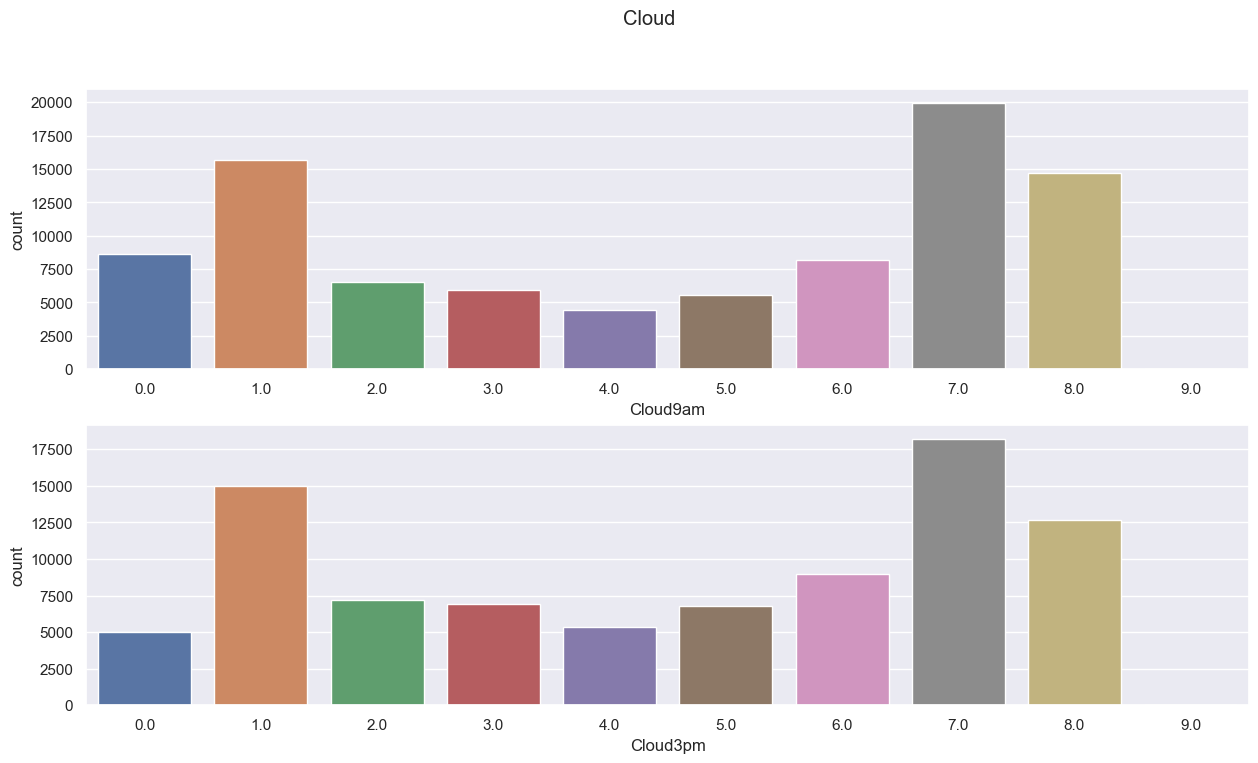

In [365]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
fig.suptitle('Cloud')
sns.countplot(ax=axes[0], x=df['Cloud9am'])
sns.countplot(ax=axes[1], x=df['Cloud3pm'])
plt.show()

### RainToday

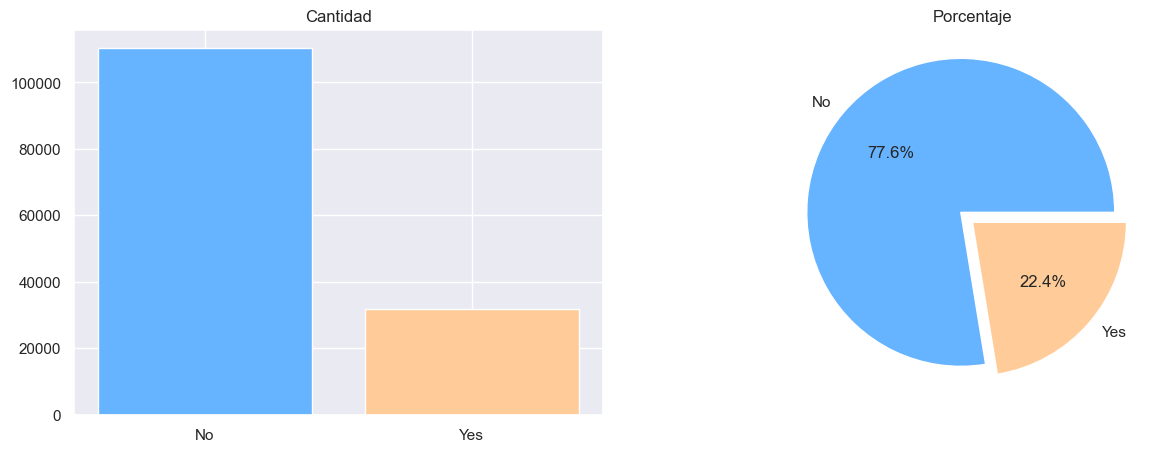

In [366]:
raintoday = df['RainToday'].value_counts()
raintoday_df = raintoday.to_frame().reset_index()
raintoday_df.columns = ["RainToday","porcentaje"]

fig = plt.figure(figsize=(15,5))

ax1=plt.subplot(121)
ax1.bar(raintoday_df["RainToday"], raintoday_df["porcentaje"], color=['#66b3ff','#ffcc99'])
ax1.set_title('Cantidad')

ax1=plt.subplot(122)
ax1.pie(raintoday.values/ len(df) * 100, explode=(0.1, 0),labels=raintoday.index, autopct='%1.1f%%', colors=['#66b3ff','#ffcc99'])
ax1.set_title('Porcentaje')
plt.show()

## Correlación entre las variables de entrada y la variable de salida:

### Temperaturas vs RainTomorrow:

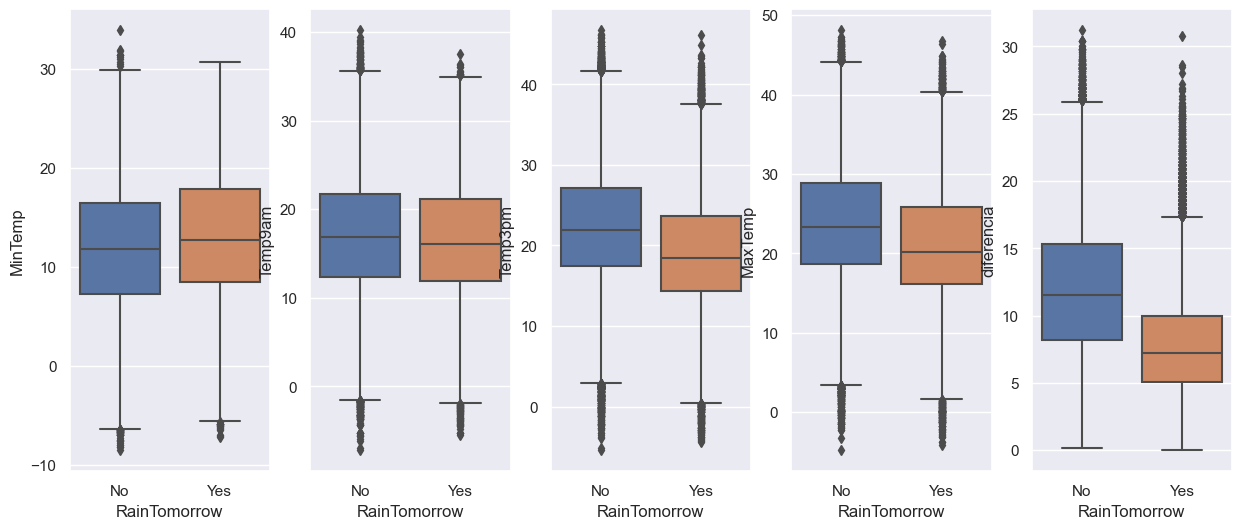

In [371]:
df_aux = pd.DataFrame.copy(df[["MinTemp", "Temp9am", "Temp3pm", "MaxTemp", "RainTomorrow"]])

df_aux["diferencia"] = df.MaxTemp - df.MinTemp

fig, axes = plt.subplots(1, 5, figsize=(15, 6))
sns.boxplot(x="RainTomorrow", y='MinTemp', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Temp9am', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Temp3pm', data=df_aux, ax=axes[2])
sns.boxplot(x="RainTomorrow", y='MaxTemp', data=df_aux, ax=axes[3])
sns.boxplot(x="RainTomorrow", y='diferencia', data=df_aux, ax=axes[4])
plt.show()

**Se observa el cambio de temperatura (diferencia entre temperatura máxima y mínima) tiene mayor efecto sobre la probabilidad de lluvia.**

### Velocidad del viento vs RainTomorrow:     

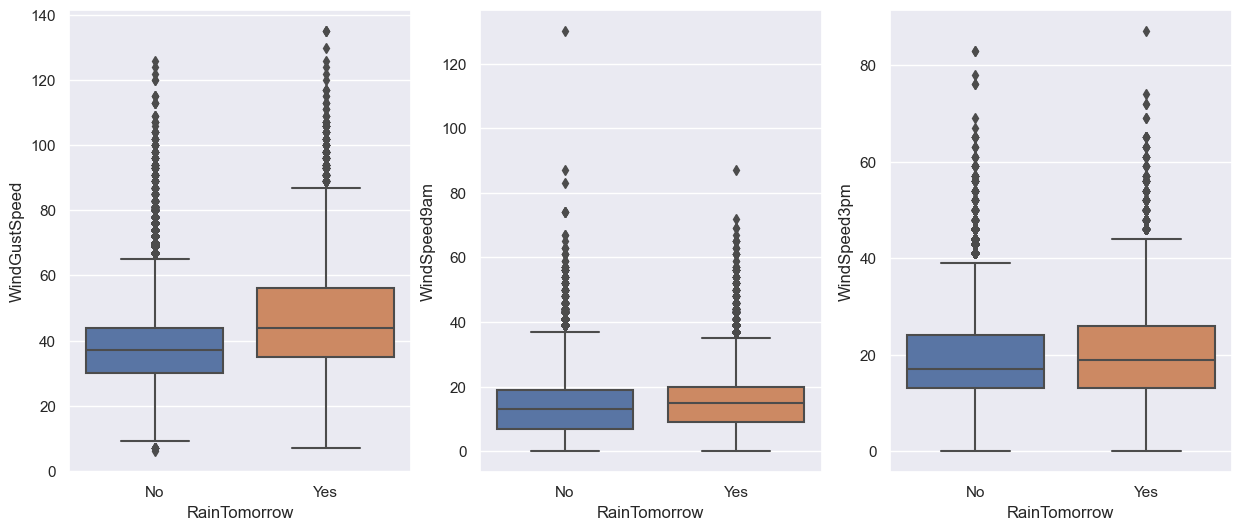

In [372]:
df_aux = pd.DataFrame.copy(df[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "RainTomorrow"]])

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.boxplot(x="RainTomorrow", y='WindGustSpeed', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='WindSpeed9am', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='WindSpeed3pm', data=df_aux, ax=axes[2])

plt.show()

* Se observa que a la variables WindGustSpeed es la que mayor efecto tienen sobre la variable de salida RainTomorrow.
* Se observa muy poca relación entre las variables WindSpeed9am, WindSpeed3pm y la variable de salida RainTomorrow.

### Dirección del viento vs RainTomorrow:

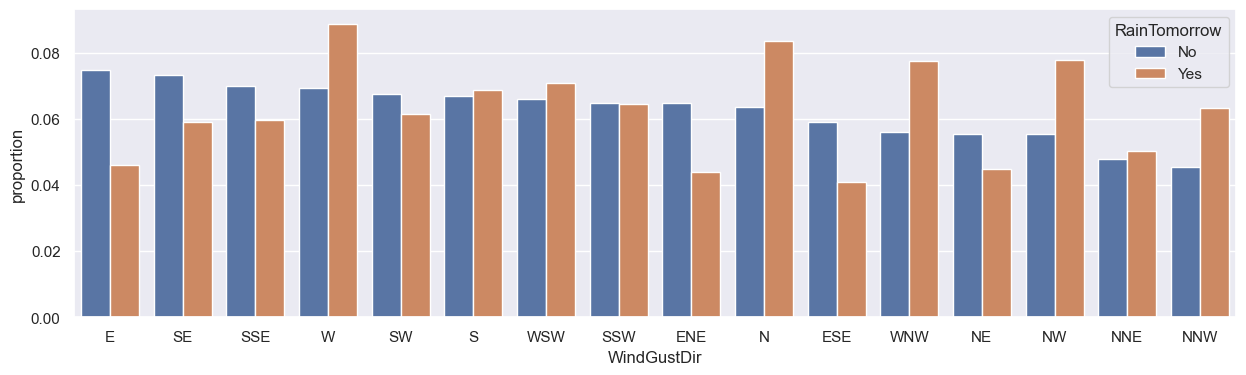

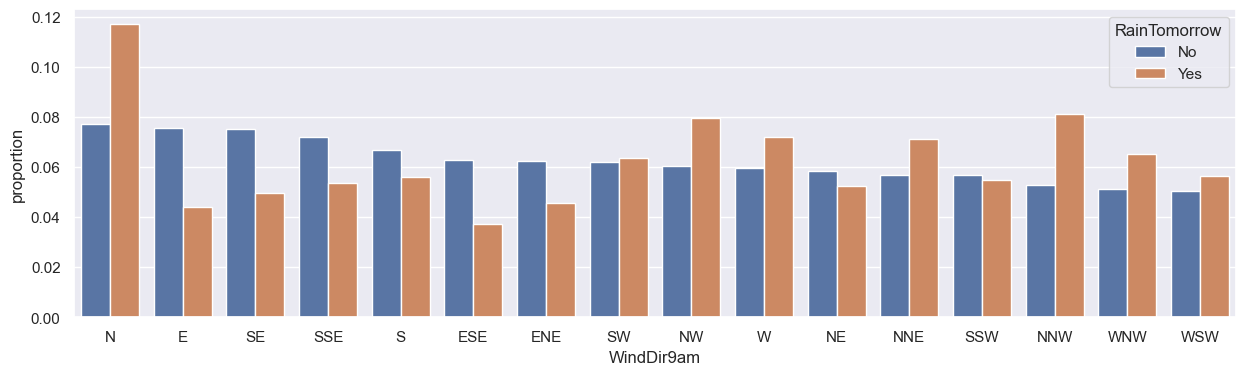

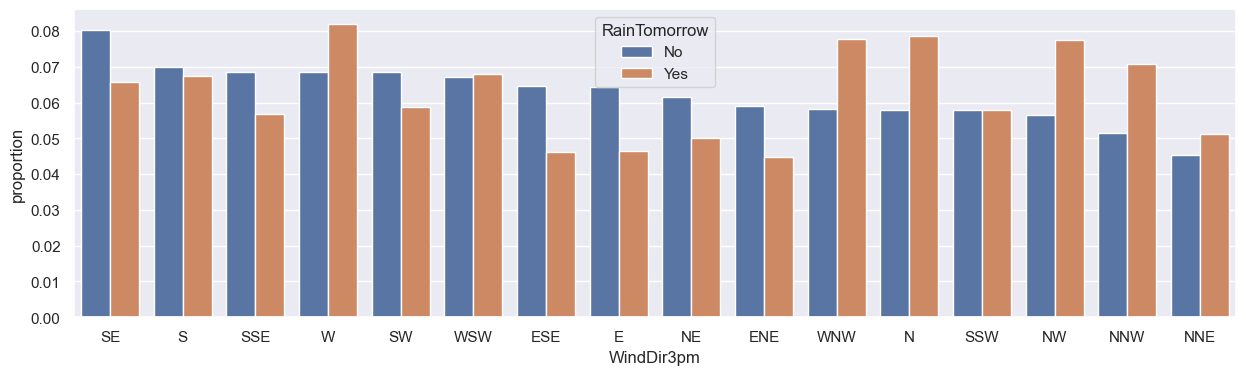

In [373]:
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindGustDir", "proportion", "RainTomorrow"
df_aux = (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())

ax = sns.barplot(x="WindGustDir", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindDir9am", "proportion", "RainTomorrow"
df_aux = (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())

ax = sns.barplot(x="WindDir9am", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(15, 4))
x, y, hue = "WindDir3pm", "proportion", "RainTomorrow"
df_aux = (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())

ax = sns.barplot(x="WindDir3pm", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

**Se observa una fuerte relación entre la dirección del viento y la probabilidad de lluvia. Cuando los vientos provienen entre el norte y el oeste (N, NNW, NW, WNW y W) existe una mayor probabilidad de lluvia.**

### Presión atmosférica y humedad relativa vs Rain Tomorrow:

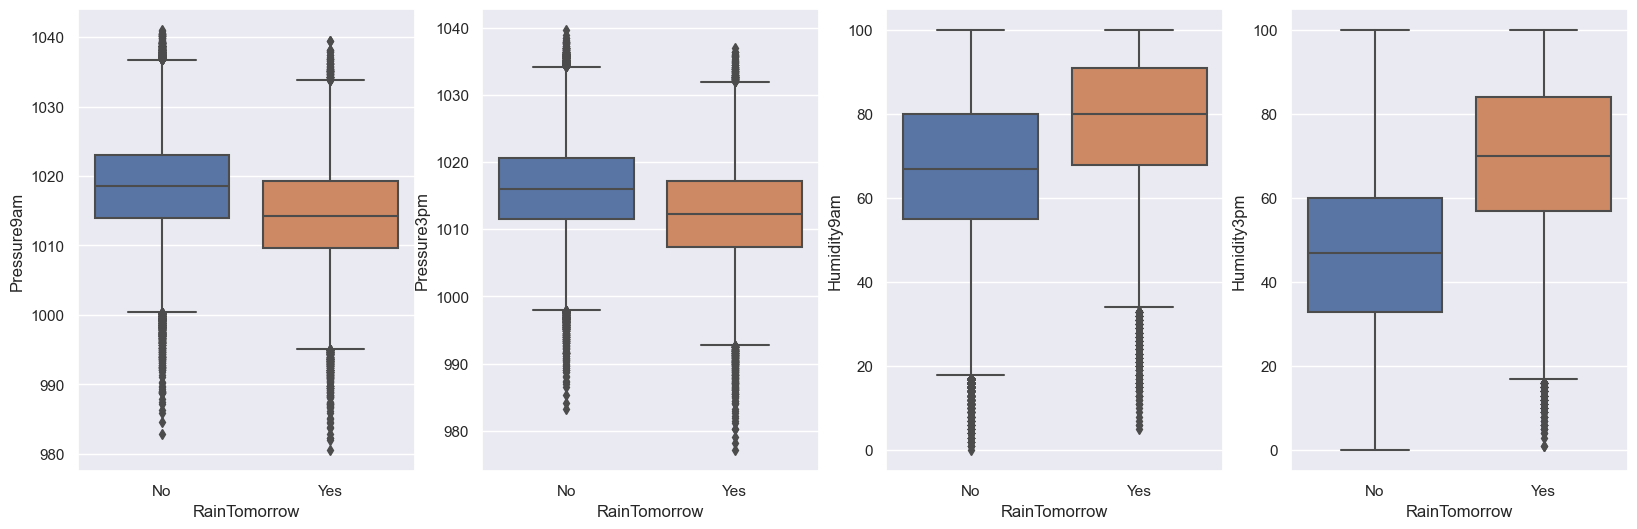

In [374]:
df_aux = pd.DataFrame.copy(df[["Pressure9am", "Pressure3pm", "Humidity9am", "Humidity3pm", "RainTomorrow"]])

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
sns.boxplot(x="RainTomorrow", y='Pressure9am', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Pressure3pm', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Humidity9am', data=df_aux, ax=axes[2])
sns.boxplot(x="RainTomorrow", y='Humidity3pm', data=df_aux, ax=axes[3])
plt.show()

* Se observa que existe una relación entre las variables Pressure y la variable salida.
* Se observa una fuerte relación en tre las variables Humidity y la variable de salida.

### RainFall Evaporation y Sunshine vs Rain Tomorrow:

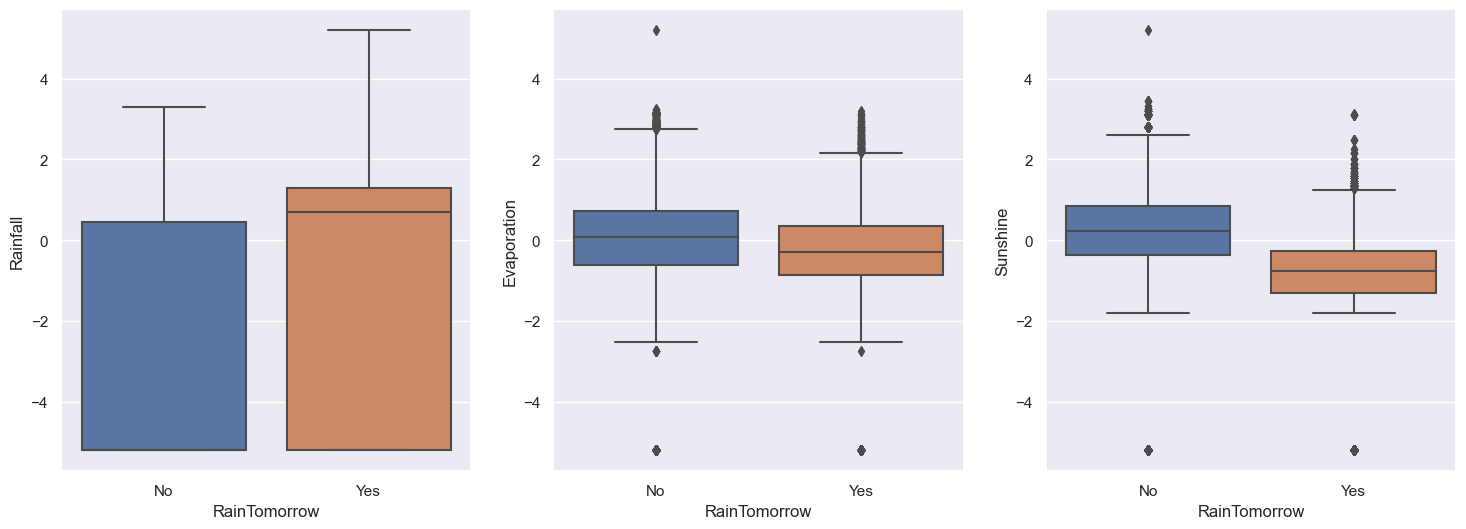

In [375]:
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)

df_aux = pd.DataFrame.copy(df[["Rainfall", "Evaporation", "Sunshine", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
data = df_aux[["Rainfall", "Evaporation", "Sunshine"]].values
data = qt.fit_transform(data)
df_aux["Rainfall"] = data[:,0]
df_aux["Evaporation"] = data[:,1]
df_aux["Sunshine"] = data[:,2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x="RainTomorrow", y='Rainfall', data=df_aux, ax=axes[0])
sns.boxplot(x="RainTomorrow", y='Evaporation', data=df_aux, ax=axes[1])
sns.boxplot(x="RainTomorrow", y='Sunshine', data=df_aux, ax=axes[2])
plt.show()

### Date vs Rain Tomorrow:
La idea es analizar los meses más propensos a lluvia.

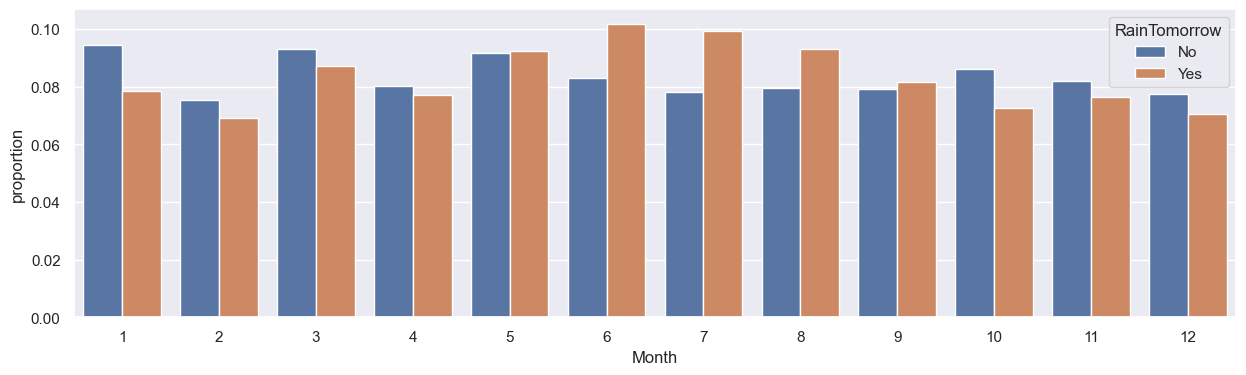

In [376]:
fig, axes = plt.subplots(1, 1, figsize=(15, 4))
df_aux = pd.DataFrame.copy(df[["Date", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Month"] = pd.to_datetime(df.Date).dt.month

x, y, hue = "Month", "proportion", "RainTomorrow"

df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Month", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()


### Rainfall por año y mes.

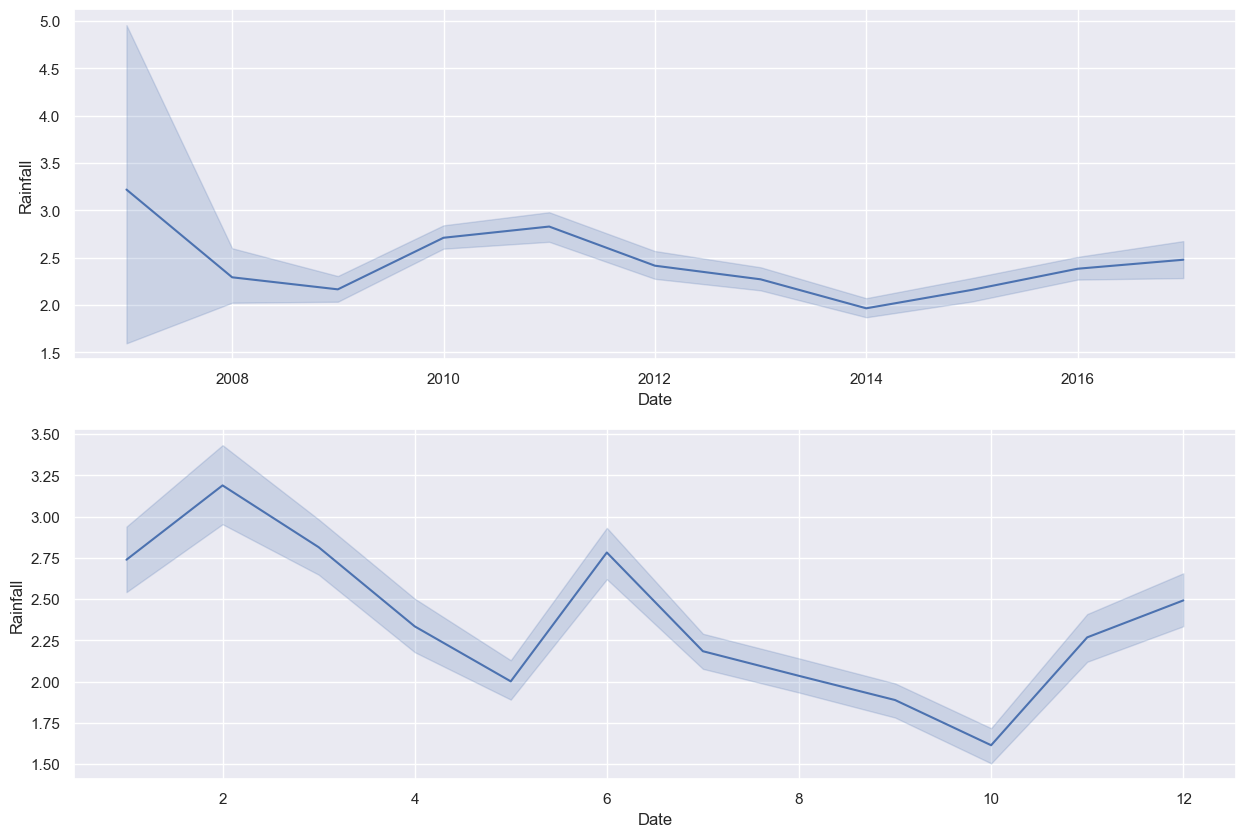

In [377]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(ax=axes[0], x=pd.to_datetime(df.Date).dt.year, y=df.Rainfall)
sns.lineplot(ax=axes[1], x=pd.to_datetime(df.Date).dt.month, y=df.Rainfall)
plt.show()

**Observaciones:**
* Se observa que el volumen de lluvia por año es bastante uniforme.
* Se observa que hay un relación significativa entre el mes y el volumen de lluvia promedio. Por ejemplo, el mes de febrero hay mayor cantidad de precipitación promedio.

### Location vs Rain Tomorrow:

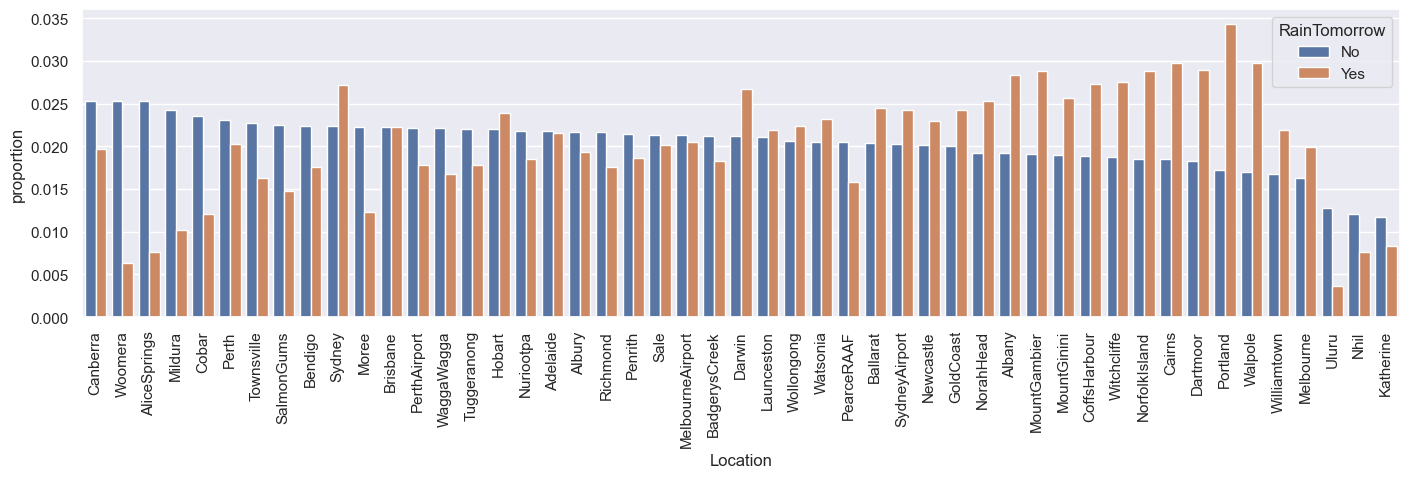

In [378]:
figure(figsize=(17,4))
plt.xticks(rotation=90)
df_aux = pd.DataFrame.copy(df[["Location", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Location"] = df_aux[["Location"]].values
x, y, hue = "Location", "proportion", "RainTomorrow"

df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Location", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

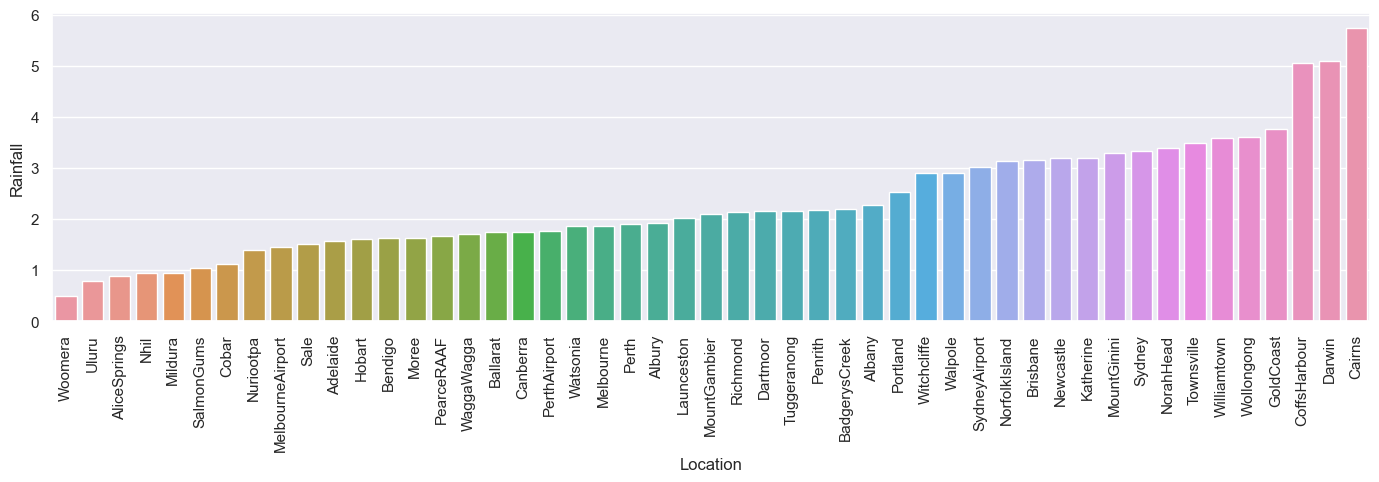

In [379]:
# Media del volumen de lluvia por localidades
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.barplot(x="Location", y="Rainfall", data=df.groupby(["Location"]).mean().reset_index().sort_values(by=["Rainfall"]))
plt.show()



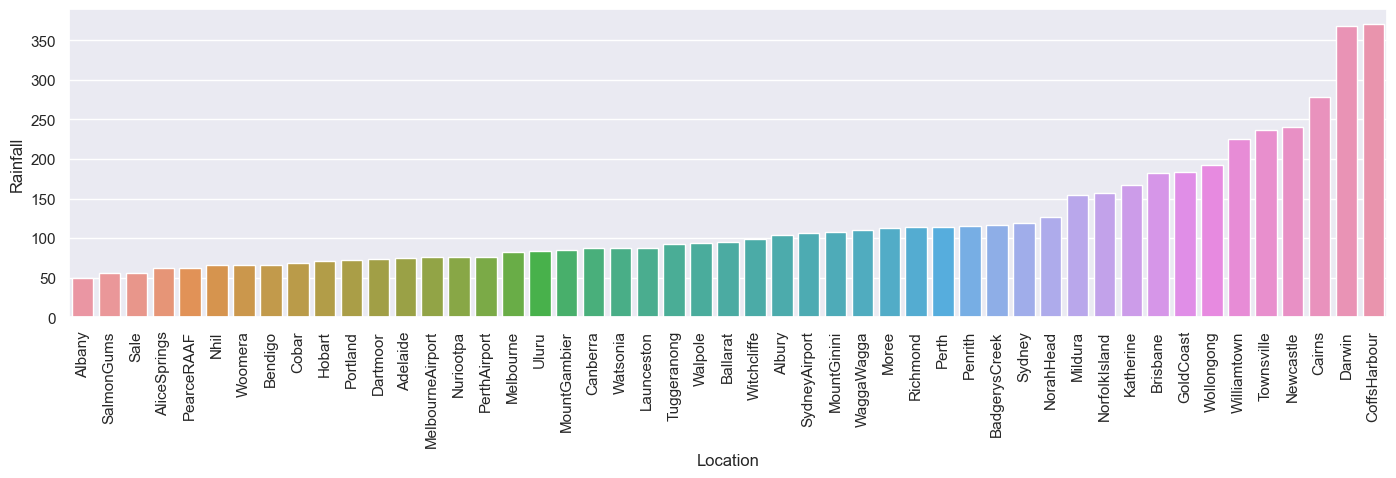

In [380]:
# Máximo volumen de lluvia por localidades
figure(figsize=(17,4))
plt.xticks(rotation=90)
sns.barplot(x="Location", y="Rainfall", data=pd.DataFrame(df.groupby(['Location'], sort=False)['Rainfall'].max().sort_values()).reset_index())
plt.show()



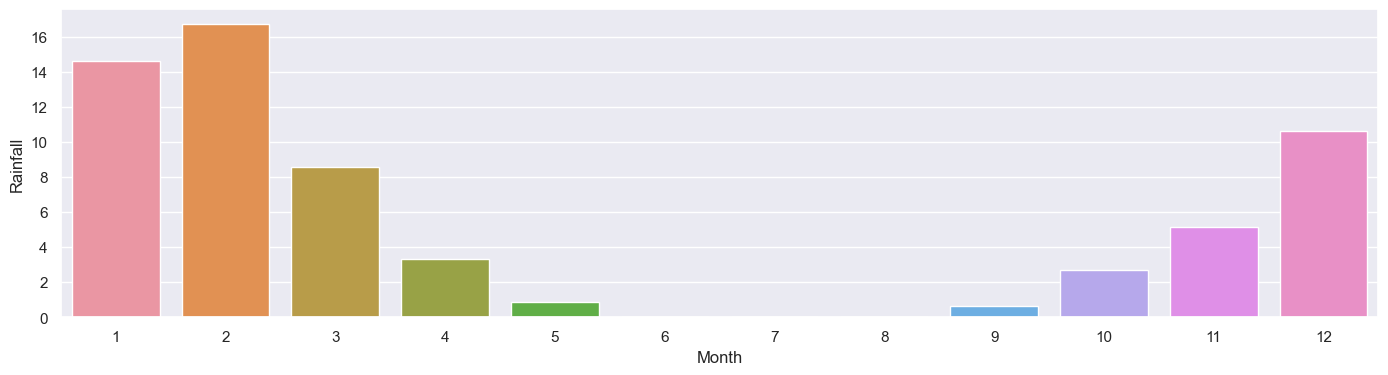

In [381]:
df["Month"] = pd.to_datetime(df.Date).dt.month
figure(figsize=(17,4))
df_aux = pd.DataFrame(df[df["Location"] == "Darwin" ].groupby(['Location', "Month"], sort=False)['Rainfall'].mean().sort_values()).reset_index()
sns.barplot(x="Month", y="Rainfall",data=df_aux )
plt.show()

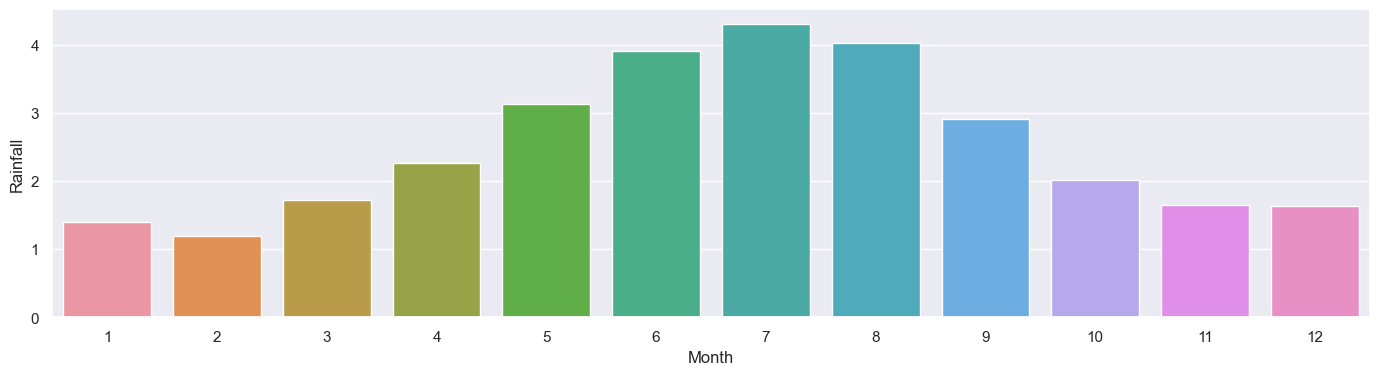

In [382]:
figure(figsize=(17,4))
df_aux = pd.DataFrame(df[df["Location"] == "Portland" ].groupby(['Location', "Month"], sort=False)['Rainfall'].mean().sort_values()).reset_index()
sns.barplot(x="Month", y="Rainfall",data=df_aux )
plt.show()

**En la localidad de Darwin los meses mas secos son de mayo a septiembre mientras que la localidad de Portland dichos meses corresponden a los meses con mayor cantidad de lluvia. Por lo cual podemos afirmar que existe una fuerte relación entre la localidad y el mes.**

### Nubosidad vs Rain Tomorrow:

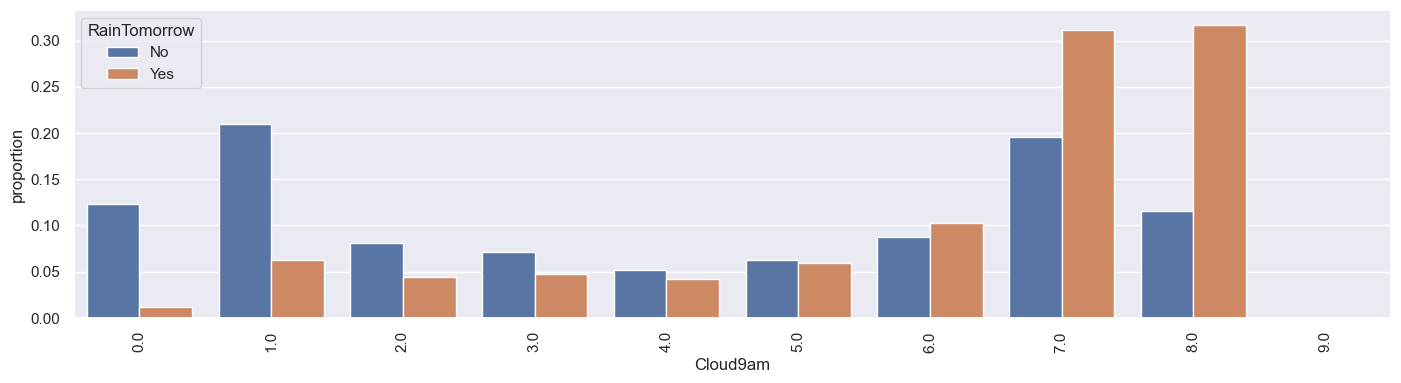

In [383]:
figure(figsize=(17,4))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["Cloud9am", "Cloud3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Cloud9am"] = df_aux[["Cloud9am"]].values
x, y, hue = "Cloud9am", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Cloud9am", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

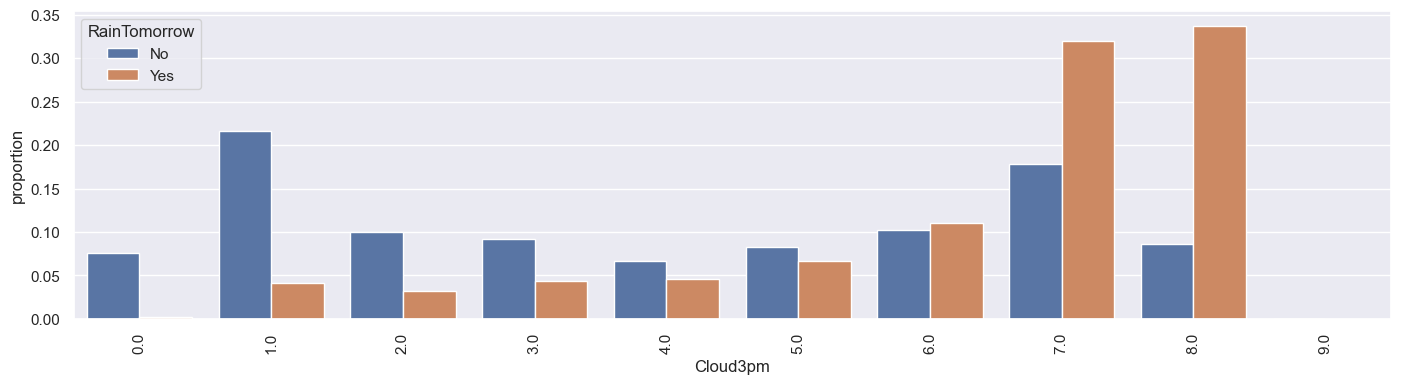

In [384]:
figure(figsize=(17,4))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["Cloud9am", "Cloud3pm", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["Cloud3pm"] = df_aux[["Cloud3pm"]].values
x, y, hue = "Cloud3pm", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="Cloud3pm", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

* Se observa una relación marcada entre la nubosidad y la probabilidad de lluvia.

### RainToday vs Rain Tomorrow:

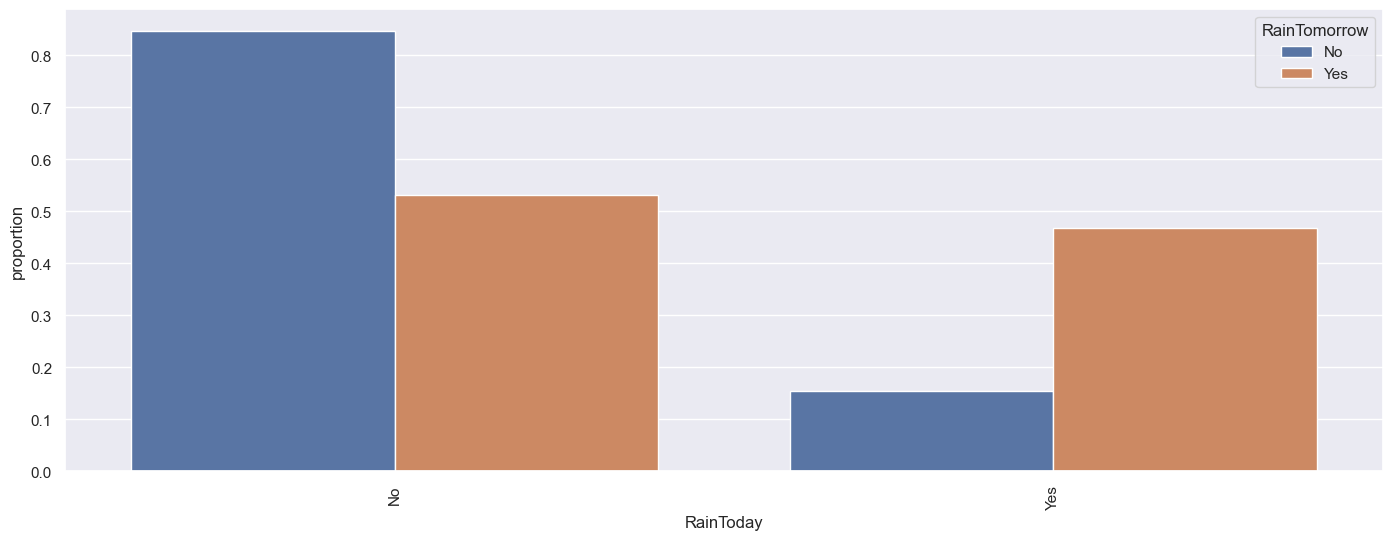

In [385]:
figure(figsize=(17,6))
plt.xticks(rotation=90)

df_aux = pd.DataFrame.copy(df[["RainToday", "RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["RainToday"] = df_aux[["RainToday"]].values
x, y, hue = "RainToday", "proportion", "RainTomorrow"
df_aux = (df_aux[x].groupby(df_aux[hue]).value_counts(normalize=True).rename(y).reset_index())
ax = sns.barplot(x="RainToday", y="proportion", data=df_aux, hue="RainTomorrow")
plt.show()

* Existe una marcada relación entre las variables RainToday y RainTomorrow. 

## Selección de variables:
### Kolmogorov-Smirnov:

In [386]:
# Kolmogorov-Smirnov Test para determinar relaciones entre variables númericas.
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=1)
features = ["dif_temp","MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm"]
df_aux = pd.DataFrame.copy(df[["MinTemp","MaxTemp", "Temp9am", "Temp3pm", "Pressure9am", "Pressure3pm", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm" ,"RainTomorrow"]])
df_aux = df_aux[~df_aux.RainTomorrow.isnull()]
df_aux["dif_temp"] = df.MaxTemp - df.MinTemp
data = df_aux[features].values
data = qt.fit_transform(data)

test_z = pd.DataFrame({'feature': [], 'statistic_z': [], 'pvalue': []})

for i, col in enumerate (features):
    df_aux[col] = data[:,i]
    x = df_aux[df_aux["RainTomorrow"] == "No"][col]
    y = df_aux[df_aux["RainTomorrow"] == "Yes"][col]
    z = ks_2samp(x, y)
    test_z = test_z.append({'feature': col, 'statistic_z': z[0], 'pvalue': z[1]}, ignore_index=True)
test_z.sort_values(by=["statistic_z"])

feature  statistic_z         pvalue
3         Temp9am     0.041036   1.268967e-36
1         MinTemp     0.069684  7.264208e-105
8     Evaporation     0.073726  2.389429e-117
11   WindSpeed9am     0.078010  2.393171e-131
12   WindSpeed3pm     0.083712  3.225377e-151
2         MaxTemp     0.162305   0.000000e+00
4         Temp3pm     0.188173   0.000000e+00
6     Pressure3pm     0.194916   0.000000e+00
5     Pressure9am     0.216400   0.000000e+00
10  WindGustSpeed     0.220457   0.000000e+00
9        Sunshine     0.250714   0.000000e+00
13    Humidity9am     0.283475   0.000000e+00
7        Rainfall     0.348507   0.000000e+00
0        dif_temp     0.367228   0.000000e+00
14    Humidity3pm     0.443290   0.000000e+00

**Utilizamos el test de Kolmogorov-Smirnov lograr determinar el grado de "separación" de las distribuciones de las variables dado RainTomorrow="Yes" y la distribución de las variables dado RainTomorrow="No".**

* La Variable Humidity3pm es la variable que muestra mayor separación, lo cual se había evidenciado en el grafico Box-plot.

## Análisis de variable categórica de salida:

### RainTomorrow:

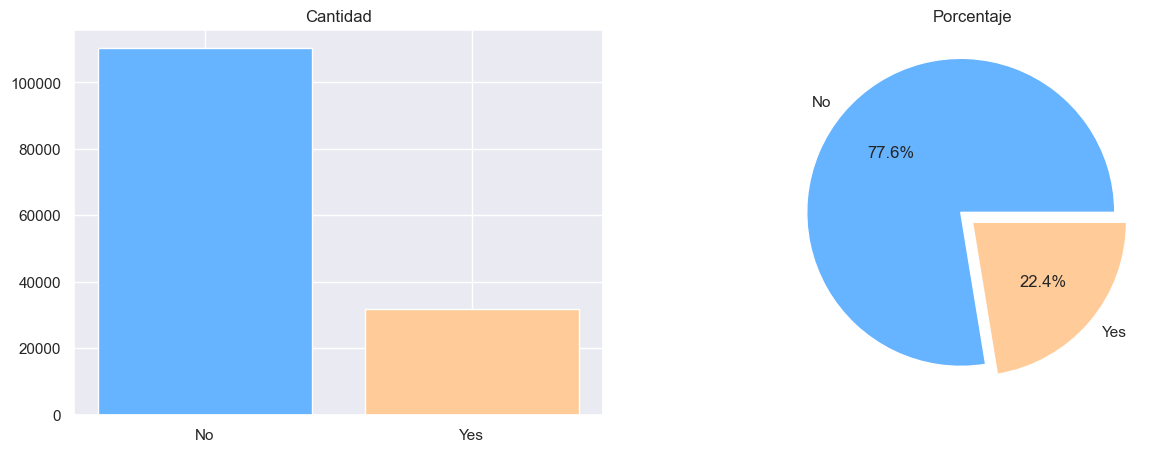

In [387]:
raintomorrow = df['RainTomorrow'].value_counts()
raintomorrow_df = raintomorrow.to_frame().reset_index()
raintomorrow_df.columns = ["RainTomorrow","porcentaje"]

fig = plt.figure(figsize=(15,5))

ax1=plt.subplot(121)
ax1.bar(raintomorrow_df["RainTomorrow"], raintomorrow_df["porcentaje"], color=['#66b3ff','#ffcc99'])
ax1.set_title('Cantidad')

ax1=plt.subplot(122)
ax1.pie(raintomorrow.values/ len(df) * 100, explode=(0.1, 0),labels=raintomorrow.index, autopct='%1.1f%%', colors=['#66b3ff','#ffcc99'])
ax1.set_title('Porcentaje')
raintomorrow_df
plt.show()

**Observaciones:**
* Las clases se encuentran desbalanceadas.

# 3. Limpieza y preparación de datos / ingeniería de features

In [388]:
sum(df.RainTomorrow.isnull())

3267

**Se observa que hay 3267 registros en null en la variable de salida.**

## Análisis de faltantes:

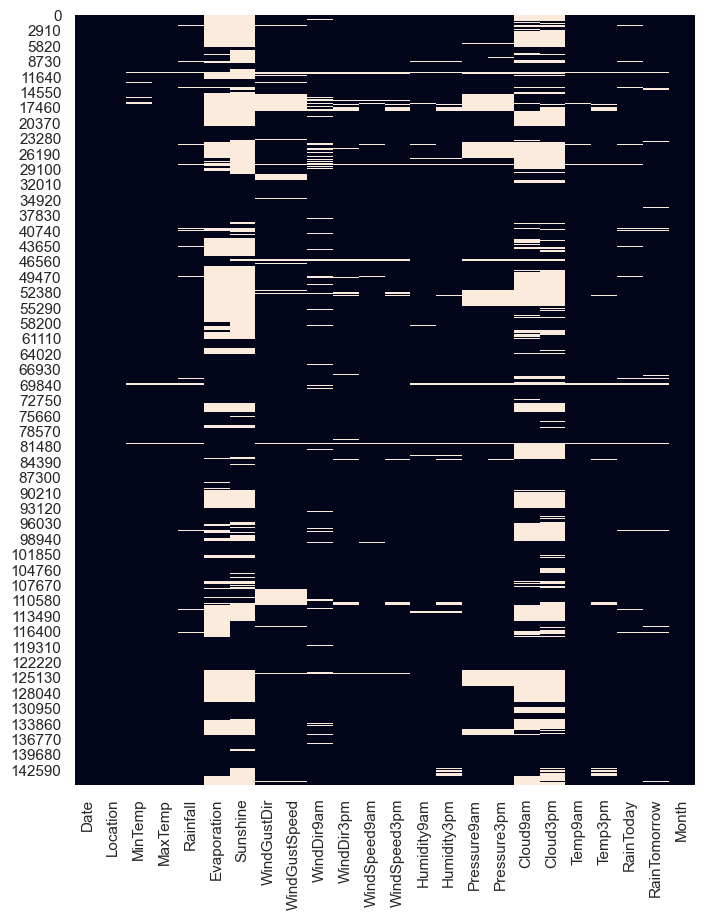

In [389]:
figure(figsize=(8,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

**Observaciones:**
* Se observa un gran número de faltantes en las columnas Evaporation, Sunshine, Cloud9am, Cloud3pm.
* Se observa que los faltantes coinciden en esas columnas, es probable que sean Missing not at Random ya que estos datos no hayan estado disponibles para determinadas localidades.

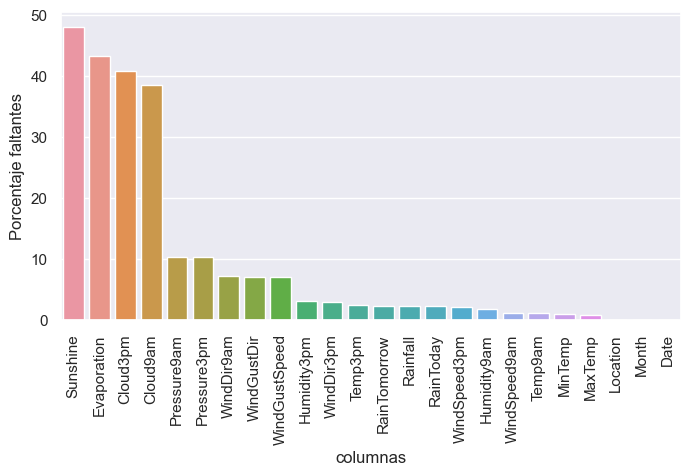

In [395]:
# Verificamos valores faltantes
faltantes = np.sum(df.isnull()/len(df)*100).sort_values(ascending=False)
faltantes_df = faltantes.to_frame().reset_index()
faltantes_df.columns = ["columnas","Porcentaje faltantes"]
figure(figsize=(8,4))
plt.xticks(rotation=90)
ax = sns.barplot(x="columnas", y="Porcentaje faltantes", data=faltantes_df)
plt.show()

In [391]:
np.sum(df.isnull()/len(df)*100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Month             0.000000
Date              0.000000
dtype: float64

### Observaciones:
* La columna "Cloud" es la características que posee mayor cantidad de faltantes.
* El resto de las columnas posee un número de faltantes por debajo al 10%.
* Las columnas "Dates" y "Location" no poseen nulos.

In [396]:
print("Proporción de faltantes en Sunshine por clase:", sum(df[df.RainTomorrow=="Yes"].Sunshine.isnull())/len(df[df.RainTomorrow=="Yes"]), sum(df[df.RainTomorrow=="No"].Sunshine.isnull())/len(df[df.RainTomorrow=="No"]))
print("Proporción de faltantes en Evaporation por clase:", sum(df[df.RainTomorrow=="Yes"].Evaporation.isnull())/len(df[df.RainTomorrow=="Yes"]), sum(df[df.RainTomorrow=="No"].Evaporation.isnull())/len(df[df.RainTomorrow=="No"]))
print("Proporción de faltantes en Cloud3pm por clase:", sum(df[df.RainTomorrow=="Yes"].Cloud3pm.isnull())/len(df[df.RainTomorrow=="Yes"]), sum(df[df.RainTomorrow=="No"].Cloud3pm.isnull())/len(df[df.RainTomorrow=="No"]))
print("Proporción de faltantes en Cloud9am por clase:", sum(df[df.RainTomorrow=="Yes"].Cloud9am.isnull())/len(df[df.RainTomorrow=="Yes"]), sum(df[df.RainTomorrow=="No"].Cloud9am.isnull())/len(df[df.RainTomorrow=="No"]))

Proporción de faltantes en Sunshine por clase: 0.472315462559212 0.47826244606403423
Proporción de faltantes en Evaporation por clase: 0.43975279982432475 0.4244624533159288
Proporción de faltantes en Cloud3pm por clase: 0.3635536593782351 0.41249682729613113
Proporción de faltantes en Cloud9am por clase: 0.3530758854346394 0.3843685412814098


Los faltanes en la columna que presentan mayor cantidad de faltantes se encuentran distribuidos en las dos clases. Si borramos los registros faltanes perderiamos muchos datos de la clase minoritaria.

In [397]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')

## Partición del dataset:

In [19]:
df = pd.read_csv("weatherAUS.csv", parse_dates=["Date"])

df = df[df.RainTomorrow.notna()]
df = df[df.RainToday.notna()]

In [20]:
location_map = {'BadgerysCreek':'Badgerys Creek','CoffsHarbour':'Coffs Harbour', 'Moree':'Moree Australia', 
                'Newcastle':'Newcastle Australia', 'NorahHead':'Norah Head', 'NorfolkIsland':'Norfolk Island',
               'Penrith':'Penrith Australia', 'Richmond': 'Richmond Australia', 'SydneyAirport': 'Sydney',
                'WaggaWagga':'Wagga Wagga', 'MountGinini': 'Mount Ginini','Sale':'Sale Australia',
                'MelbourneAirport':'Melbourne', 'Nhil':'Nhil Australia', 'Portland':'Portland Australia',
                'Dartmoor': 'Dartmoor Australia', 'GoldCoast':'Queensland', 'MountGambier':'Mount Gambier',
                'Albany': 'Albany Australia', 'PearceRAAF':'Bullsbrook', 'PerthAirport':'Perth', 'SalmonGums':'Salmon Gums',
                'Walpole':'Walpole Australia', 'AliceSprings':'Alice Springs','Albury':'Albury', 'Cobar':'Cobar', 'Sydney':'Sydney', 'Williamtown':'Williamtown', 
                'Wollongong':'Wollongong','Canberra':'Canberra', 'Tuggeranong':'Tuggeranong', 
                'Ballarat':'Ballarat', 'Bendigo':'Bendigo', 'Melbourne':'Melbourne','Mildura':'Mildura', 
                'Watsonia':'Watsonia', 'Brisbane':'Brisbane', 'Cairns':'Cairns', 'Townsville':'Townsville',
                'Adelaide':'Adelaide', 'Nuriootpa':'Nuriootpa', 'Woomera':'Woomera', 'Witchcliffe':'Witchcliffe', 
                'Perth':'Perth','Hobart':'Hobart', 'Launceston':'Launceston', 'Darwin':'Darwin', 'Katherine':'Katherine', 'Uluru':'Uluru'
               }

df['location_new'] = df['Location'].map(location_map)

In [21]:
location = df.location_new.unique()

In [22]:
# Transformación Location en coordenadas:
# geo_location = {}
# for loc in location:
#     geolocator = Nominatim(user_agent="my_name")      
#     location = geolocator.geocode(loc)
#     geo_location[loc]=(location.latitude, location.longitude)

In [23]:
location_df = pd.DataFrame.from_dict(geo_location,orient='index',).rename(columns={0: "latitude", 1: "longitude"})
location_df

latitude   longitude
Albury              -36.080477  146.916280
Badgerys Creek      -33.881667  150.744163
Cobar               -31.498333  145.834444
Coffs Harbour       -30.296241  153.113529
Moree Australia     -29.461720  149.840715
Newcastle Australia -32.919295  151.779535
Norah Head          -33.281667  151.567778
Norfolk Island      -29.028958  167.958729
Penrith Australia   -33.751079  150.694168
Richmond Australia  -20.569655  142.928360
Sydney              -33.854816  151.216454
Wagga Wagga         -35.115000  147.367778
Williamtown         -32.815000  151.842778
Wollongong          -34.424394  150.893850
Canberra            -35.297591  149.101268
Tuggeranong         -35.420977  149.092134
Mount Ginini        -35.529720  148.772635
Ballarat            -37.562303  143.860565
Bendigo             -36.758877  144.282593
Sale Australia      -38.105036  147.064790
Melbourne           -37.814218  144.963161
Mildura             -34.184726  142.162497
Nhil Australia      -35.471309  141.306236
Portland Australia  -38.345623  141.604230
Watsonia            -37.711002  145.083635
Dartmoor Australia  -37.922544  141.276655
Brisbane            -27.468968  153.023499
Cairns              -16.920666  145.772185
Queensland          -22.164678  144.584490
Townsville          -19.256939  146.823954
Adelaide            -34.928181  138.599931
Mount Gambier       -37.824670  140.782007
Nuriootpa           -34.469335  138.993901
Woomera             -31.199914  136.825353
Albany Australia    -35.024782  117.883608
Witchcliffe         -34.026335  115.100477
Bullsbrook          -31.669633  115.997933
Perth               -31.952712  115.860480
Salmon Gums         -32.981535  121.643942
Walpole Australia   -34.977680  116.731006
Hobart              -42.882509  147.328123
Launceston          -41.434081  147.137350
Alice Springs       -23.698388  133.881289
Darwin              -12.460440  130.841047
Katherine           -14.464616  132.263599
Uluru               -25.344857  131.032517

In [24]:
location_df["location_new"] = location_df.index

In [25]:
df = pd.merge(df, location_df, on='location_new', how='left')

In [26]:
df = df.drop(['Location','location_new'], axis=1)

In [27]:
#Se elimino Evaporation por tener muchos faltantes y poca correlación con la variable de salida:
df = df.drop(['Evaporation', 'Sunshine'], axis=1)

## Eliminación de Variable e imputación manual:

In [28]:
# Imputo faltantes de Cloud9am por valores de Cloud3pm
df.loc[df.Cloud9am.isnull(), "Cloud9am"] = df[df.Cloud9am.isnull()].Cloud3pm

# Imputo faltantes de Cloud3pm por valores de Cloud9am
df.loc[df.Cloud3pm.isnull(), "Cloud3pm"]= df[df.Cloud3pm.isnull()].Cloud9am

df['Cloud'] = df[['Cloud9am', 'Cloud3pm']].mean(axis=1,skipna=True)
df = df.drop(['Cloud9am','Cloud3pm'], axis=1)


In [29]:
# Si RainToday=Yes actualizo el faltante de Cloud con el promedio
indice = df[df.Cloud.isnull()][df[df.Cloud.isnull()].RainToday=='Yes'].index
df.loc[indice, "Cloud"] = 6

In [30]:
# Si RainToday=No actualizo el faltante de Cloud con el cero
indice = df[df.Cloud.isnull()][df[df.Cloud.isnull()].RainToday=='No'].index
df.loc[indice, "Cloud"] = 4

In [31]:
# Imputo faltantes de WindDir9am por valores de WindGustDir
df.loc[df.WindDir9am.isnull(), "WindDir9am"]= df[df.WindDir9am.isnull()].WindGustDir

# Imputo faltantes de WindDir3pm por valores de WindGustDir
df.loc[df.WindDir3pm.isnull(), "WindDir3pm"]= df[df.WindDir3pm.isnull()].WindGustDir

# Imputo faltantes de WindDir3pm por valores de WindGustDir
df.loc[df.WindDir3pm.isnull(), "WindDir3pm"]= df[df.WindDir3pm.isnull()].WindDir9am

# Imputo faltantes de WindGustDir por valores de WindDir3pm
df.loc[df.WindGustDir.isnull(), "WindGustDir"]= df[df.WindGustDir.isnull()].WindDir3pm

In [32]:
# Imputo faltantes de MinTemp por valores de Temp9am
df.loc[df.MinTemp.isnull(), "MinTemp"] = df[df.MinTemp.isnull()].Temp9am

# Imputo faltantes de MaxTemp por valores de Temp3pm
df.loc[df.MaxTemp.isnull(), "MaxTemp"] = df[df.MaxTemp.isnull()].Temp3pm


df['TemperaturaMinima'] = df[['MinTemp', 'Temp9am']].mean(axis=1,skipna=True)
df['TemperaturaMaxima'] = df[['MaxTemp', 'Temp3pm']].mean(axis=1,skipna=True)

df = df.drop(['Temp3pm', 'Temp9am'], axis=1)

df['difTem'] = abs(df.TemperaturaMaxima - df.TemperaturaMinima)

In [33]:
# Imputo faltantes de WindSpeed3pm por valores de WindGustSpeed
df.loc[df.WindSpeed3pm.isnull(), "WindSpeed3pm"] = df[df.WindSpeed3pm.isnull()].WindGustSpeed

# Imputo faltantes de WindSpeed3pm por valores de WindSpeed9am
df.loc[df.WindSpeed3pm.isnull(), "WindSpeed3pm"] = df[df.WindSpeed3pm.isnull()].WindSpeed9am

# Imputo faltantes de WindGustSpeed por valores de WindSpeed3pm
df.loc[df.WindGustSpeed.isnull(), "WindGustSpeed"] = df[df.WindGustSpeed.isnull()].WindSpeed3pm

df = df.drop(['WindSpeed3pm','WindSpeed9am'], axis=1)

In [34]:
# Imputo faltantes de WindDir3pm por valores de WindGustDir
df.loc[df.WindDir3pm.isnull(), "WindDir3pm"] = df[df.WindDir3pm.isnull()].WindGustDir

# Imputo faltantes de WindDir3pm por valores de WindDir9am
df.loc[df.WindDir3pm.isnull(), "WindDir3pm"] = df[df.WindDir3pm.isnull()].WindDir9am

# Imputo faltantes de WindGustDir por valores de WindDir3pm
df.loc[df.WindGustDir.isnull(), "WindGustDir"] = df[df.WindGustDir.isnull()].WindDir3pm

df = df.drop(['WindDir3pm','WindDir9am'], axis=1)

In [35]:
# Promedio los valores de presiones ignorando los faltantes
df['Pressure'] = df[['Pressure9am', 'Pressure3pm']].mean(axis=1,skipna=True)
df = df.drop(['Pressure9am','Pressure3pm'], axis=1)

In [36]:
# Imputo faltantes de Humidity3pm por valores de Humidity9am
df.loc[df.Humidity3pm.isnull(), "Humidity3pm"] = df[df.Humidity3pm.isnull()].Humidity9am

# Imputo faltantes de Humidity9am por valores de Humidity3pm
df.loc[df.Humidity9am.isnull(), "Humidity9am"] = df[df.Humidity9am.isnull()].Humidity3pm


### Dirección del viento:
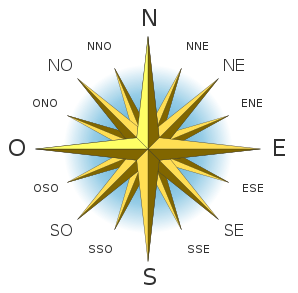

In [37]:
# Convertimos la variable WindGustDir a una variable categoríca númerica
wind_dir = {'N':1, 'NNE':2, 'NE':3, 'ENE':4, 'E':5, 'ESE':6, 'SE':7, 'SSE':8, 'S':9, 'SSW':10, 'SW':11, 'WSW': 12, 'W':13, 'WNW':14, 'NW':15, 'NNW':16}
df['WindGustDir_new'] = df['WindGustDir'].map(wind_dir)

df = df.drop(['WindGustDir'], axis=1)

#Convertimos la variable RainToday
df['RainToday_new'] = df['RainToday'].map({'Yes':1, 'No':0})
df['Raintomorrow_new'] = df['RainTomorrow'].map({'Yes':1, 'No':0})

df = df.drop(['RainToday'], axis=1)
df = df.drop(['RainTomorrow'], axis=1)

#Convertimos la variable Date
df["Month"] = pd.to_datetime(df.Date).dt.month

df = df.rename(columns={"Raintomorrow_new": "Raintomorrow","RainToday_new": "RainToday", "WindGustDir_new": "WindGustDir", 'WindDir3pm_new':'WindDir3pm', 'WindDir9am_new':'WindDir9am'})


In [38]:
#Transformación month:
df["month_cos"] = np.cos(df.Month / 12 * 2 * np.pi)
df["month_sen"] = np.sin(df.Month / 12 * 2 * np.pi)

#Transformación WindGustDir:
df["WindGustDir_cos"] = np.cos(df.WindGustDir / 18 * 2 * np.pi)

df["WindGustDir_sen"] = np.sin(df.WindGustDir / 18 * 2 * np.pi)

df = df.drop(['WindGustDir'], axis=1)

In [39]:
# df = df.drop(['Date', 'Month'], axis=1)
df = df.drop(['Date',], axis=1)

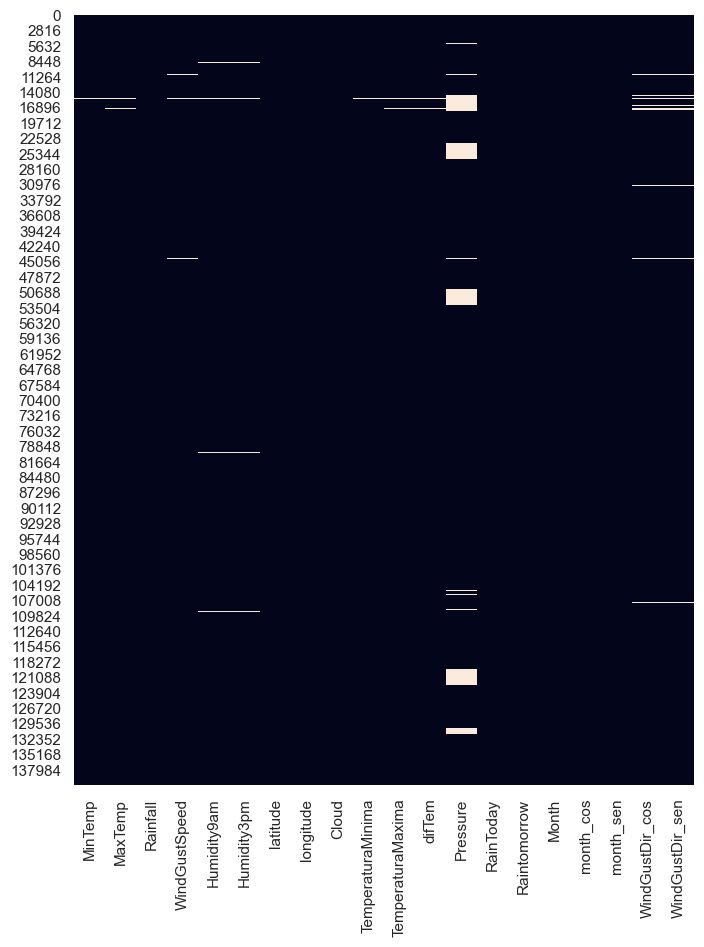

In [40]:
figure(figsize=(8,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Raintomorrow'], axis=1), df.Raintomorrow, test_size=0.33, random_state=42, stratify=df.Raintomorrow)

## Imputación estadística:

most_frequent
mean
constant
median


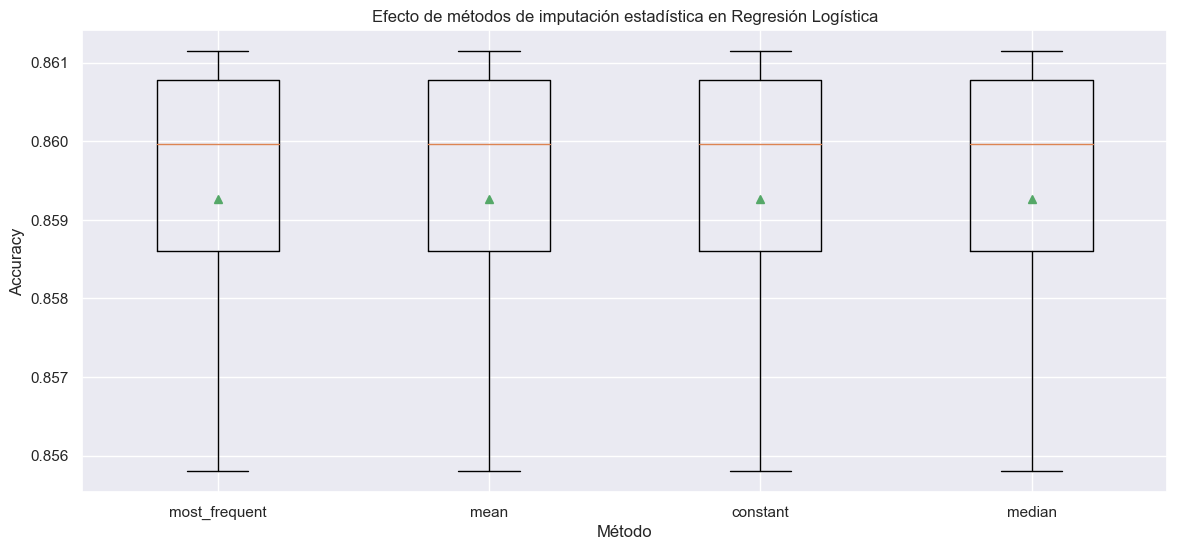

In [531]:
param_grid = {"imputer__strategy": ['most_frequent', 'mean','constant','median' ]}


results=[]
for param in param_grid["imputer__strategy"]:
    print(param)
    clf = Pipeline(steps=[  ( 'imputer' ,SimpleImputer()), 
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('logistic', LogisticRegression())
                     ])
    
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, scoring= 'roc_auc' , cv=cv)    
    results.append(scores)
    
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=param_grid["imputer__strategy"],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Efecto de métodos de imputación estadística en Regresión Logística");
plt.show()

## Imputación MICE:

4
5
6
7
8


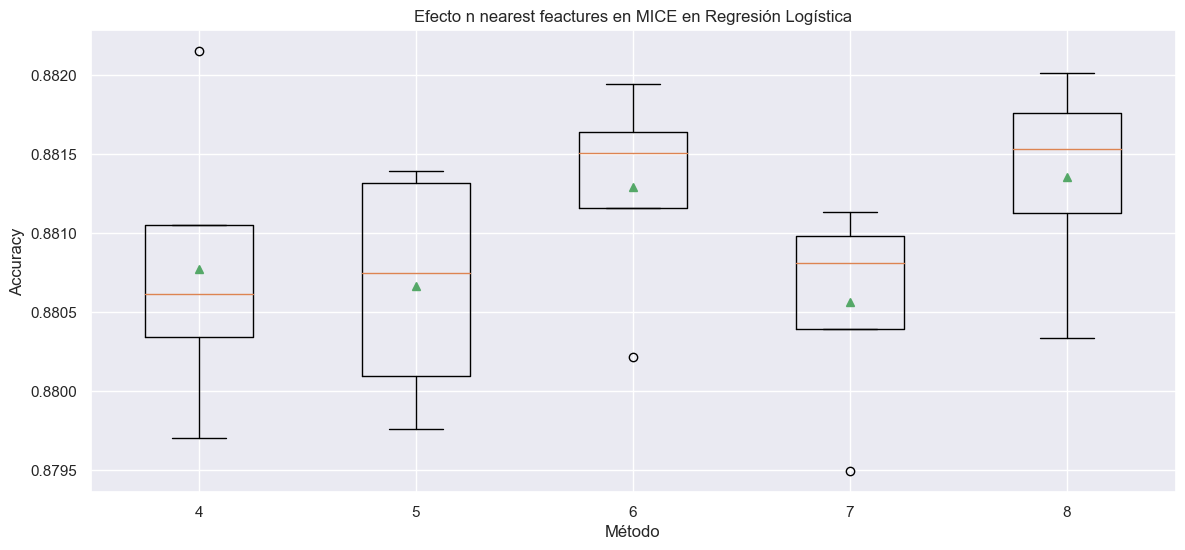

In [532]:
results=[]

param_grid = {
    "imputer__n_nearest_features": [4,5,6,7,8]
}

for param in param_grid["imputer__n_nearest_features"]:
    print(param)
    pipeline = Pipeline(steps=[
        ( 'imputer' ,IterativeImputer(n_nearest_features=param)),
        ('scaler', PowerTransformer(method='yeo-johnson')),
        ( 'lr' , RandomForestClassifier())
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, scoring= 'roc_auc' , cv=cv, n_jobs=-1)    
    results.append(scores)
    
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=param_grid["imputer__n_nearest_features"],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Efecto n nearest feactures en MICE en Regresión Logística");
plt.show()

LogisticRegression()
RandomForestClassifier()
SGDClassifier()
RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))


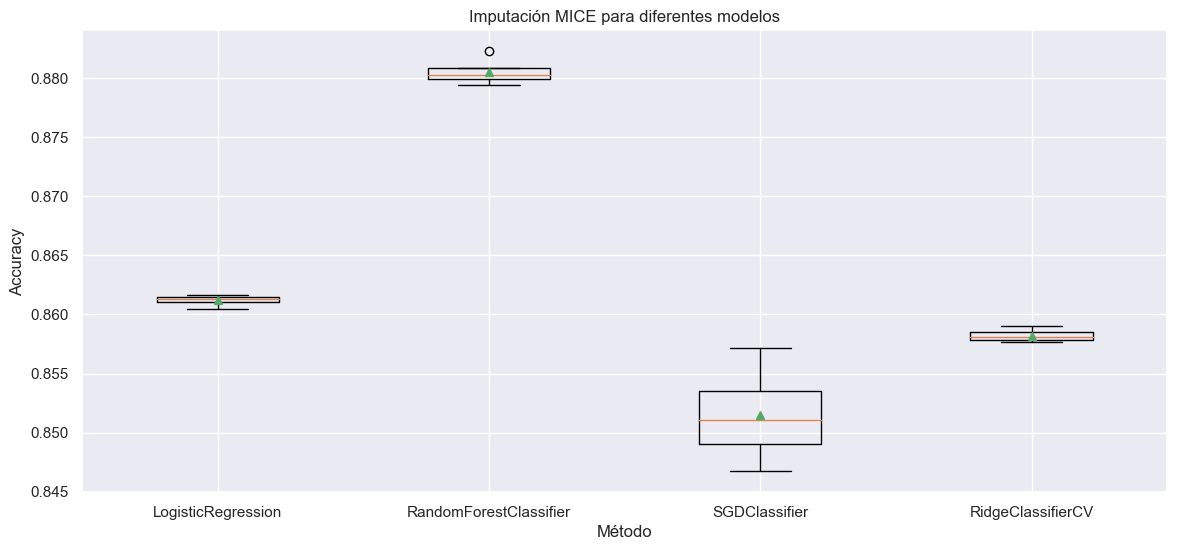

In [534]:
pt = PowerTransformer(method='yeo-johnson')
modelos = [LogisticRegression(), RandomForestClassifier(), SGDClassifier(), RidgeClassifierCV()]

results = []
for m in modelos:
    print (m)
    pipeline = Pipeline(steps=[
        ( 'imputer' ,IterativeImputer(n_nearest_features=4)),
        ('scaler', PowerTransformer(method='yeo-johnson')),
        ( 'lr' , m)
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, scoring= 'roc_auc' , cv=cv, n_jobs=-1)
    results.append(scores)
    
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels= ['LogisticRegression','RandomForestClassifier', 'SGDClassifier', 'RidgeClassifierCV'], showmeans=True)

axes.set_xlabel("Método")
axes.set_ylabel("Accuracy")
axes.set_title("Imputación MICE para diferentes modelos");
plt.show()

### Resampling balancear clases

In [569]:
#Regresión logistica sin sampling:
clf = Pipeline(steps=[
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('model_' , RandomForestClassifier(n_estimators = 200,))])

    

model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test, y_pred,digits=5))

ROC Area under Curve = 0.7387508543699783
              precision    recall  f1-score   support

           0    0.87538   0.95507   0.91349     36164
           1    0.76799   0.52244   0.62185     10296

    accuracy                        0.85919     46460
   macro avg    0.82168   0.73875   0.76767     46460
weighted avg    0.85158   0.85919   0.84886     46460



In [537]:
models = [SMOTE(random_state=42), RandomUnderSampler(random_state=42), RandomOverSampler(),NearMiss()]

for model in models:
    print (model)
    clf = Pipeline(steps=[
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('resampling',model ),
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('model_' , RandomForestClassifier(n_estimators = 200,max_leaf_nodes = 200,))])

    

    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test, y_pred,digits=5))


SMOTE(random_state=42)
ROC Area under Curve = 0.7765926281438945
              precision    recall  f1-score   support

           0    0.90734   0.86263   0.88442     36164
           1    0.58867   0.69056   0.63556     10296

    accuracy                        0.82449     46460
   macro avg    0.74800   0.77659   0.75999     46460
weighted avg    0.83672   0.82449   0.82927     46460

RandomUnderSampler(random_state=42)
ROC Area under Curve = 0.7871630421956713
              precision    recall  f1-score   support

           0    0.92706   0.79363   0.85518     36164
           1    0.51855   0.78069   0.62317     10296

    accuracy                        0.79077     46460
   macro avg    0.72281   0.78716   0.73917     46460
weighted avg    0.83653   0.79077   0.80376     46460

RandomOverSampler()
ROC Area under Curve = 0.7878359082387951
              precision    recall  f1-score   support

           0    0.92574   0.80149   0.85915     36164
           1    0.52614   0.7741

1. Random Under-Sampling
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

2. Random Over-Sampling
Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

3. Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

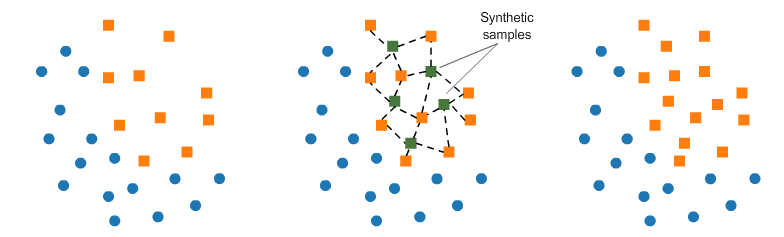

SMOTE algorithm works in 4 simple steps:

Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
Repeat the steps until data is balanced

In [538]:
models = [SMOTE(random_state=42), ADASYN(random_state=42), BorderlineSMOTE(random_state=42), KMeansSMOTE(random_state=42), SVMSMOTE(random_state=42)]

for model in models:
    print (model)
    clf = Pipeline(steps=[
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('resampling',model ),
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('model_' , RandomForestClassifier(n_estimators = 200,max_leaf_nodes = 200,))])

    

    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test, y_pred,digits=5))

SMOTE(random_state=42)
ROC Area under Curve = 0.7781457326792466
              precision    recall  f1-score   support

           0    0.90878   0.85922   0.88331     36164
           1    0.58502   0.69707   0.63615     10296

    accuracy                        0.82329     46460
   macro avg    0.74690   0.77815   0.75973     46460
weighted avg    0.83703   0.82329   0.82853     46460

ADASYN(random_state=42)
ROC Area under Curve = 0.7753089407427977
              precision    recall  f1-score   support

           0    0.90938   0.84714   0.87716     36164
           1    0.56714   0.70348   0.62800     10296

    accuracy                        0.81530     46460
   macro avg    0.73826   0.77531   0.75258     46460
weighted avg    0.83353   0.81530   0.82194     46460

BorderlineSMOTE(random_state=42)
ROC Area under Curve = 0.7802553540303789
              precision    recall  f1-score   support

           0    0.91661   0.82372   0.86769     36164
           1    0.54337   0.736

C:\Users\pperez\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


ROC Area under Curve = 0.7361170249885547
              precision    recall  f1-score   support

           0    0.87896   0.91464   0.89644     36164
           1    0.65032   0.55760   0.60040     10296

    accuracy                        0.83551     46460
   macro avg    0.76464   0.73612   0.74842     46460
weighted avg    0.82829   0.83551   0.83084     46460

SVMSMOTE(random_state=42)
ROC Area under Curve = 0.7836825346365219
              precision    recall  f1-score   support

           0    0.91554   0.83932   0.87577     36164
           1    0.56331   0.72805   0.63517     10296

    accuracy                        0.81466     46460
   macro avg    0.73943   0.78368   0.75547     46460
weighted avg    0.83749   0.81466   0.82245     46460



In [566]:
pipeline = Pipeline(steps=[ 
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('resampling',SMOTE(random_state=42)),
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('model_' , RandomForestClassifier(max_depth= 250, n_estimators = 200,max_leaf_nodes = 200,))])


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test, y_pred,digits=5))



ROC Area under Curve = 0.7746338939237956
              precision    recall  f1-score   support

           0    0.90604   0.86395   0.88450     36164
           1    0.58918   0.68531   0.63362     10296

    accuracy                        0.82437     46460
   macro avg    0.74761   0.77463   0.75906     46460
weighted avg    0.83582   0.82437   0.82890     46460



## Ajuste hyperparametros 

In [575]:
results=[]

# param_grid = {'Forest__max_depth':[150, 200, 250], 'Forest__min_samples_split':[1,2,4],'Forest__min_samples_leaf':[2,4] }
param_grid = [
{'Forest__n_estimators': [10, 25], 'Forest__max_features': [5, 10], 
 'Forest__max_depth': [10, 50, None], 'Forest__bootstrap': [True, False]}
]

pipeline = Pipeline(steps=[
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('resampling',SMOTE(random_state=42)),
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('Forest' , RandomForestClassifier())])
    
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
search = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv=cv,n_jobs=-1)
results =search.fit(X_train,y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.845):
{'Forest__bootstrap': False, 'Forest__max_depth': None, 'Forest__max_features': 5, 'Forest__n_estimators': 25}


## PCA

1
3
5
6
9
17


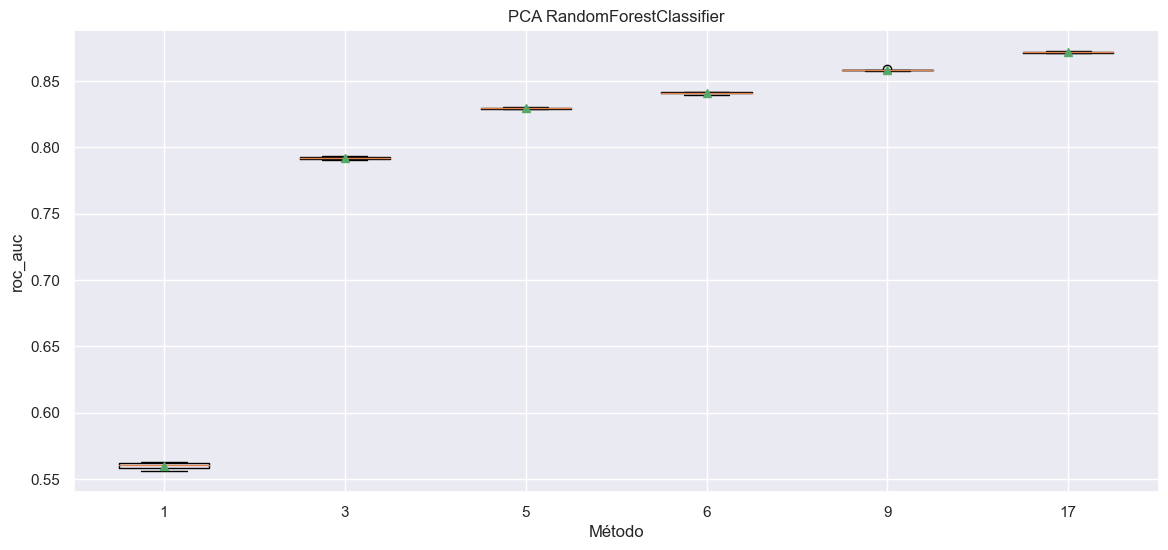

In [42]:
results=[]

param_grid = {'pca__n_components': [1, 3, 5, 6, 9, 17], }

pca = PCA()
for param in param_grid["pca__n_components"]:
    print(param)
    pipeline = Pipeline(steps=[
     ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),

      ('scaler', PowerTransformer(method='yeo-johnson')),
      ('ss', StandardScaler()),
      ('pca', PCA(n_components=param)),
      ( 'lr' , RandomForestClassifier(max_depth=100))
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, scoring= 'roc_auc' , cv=cv, n_jobs=-1)    
    results.append(scores)
    
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=param_grid["pca__n_components"],showmeans=True)
axes.set_xlabel("Método")
axes.set_ylabel("roc_auc")
axes.set_title("PCA RandomForestClassifier");
plt.show()

In [602]:
pca = PCA()
param_grid = {'pca__n_components': [ 3, 5, 6, 17], }

clf = Pipeline(steps=[
                              ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),

                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('pca', pca),
                          ('logistic', RandomForestClassifier(max_depth=200, ))
                     ])

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
search = GridSearchCV(estimator=clf,param_grid=param_grid,cv=cv, n_jobs=-1)
results =search.fit(X_train,y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.850):
{'pca__n_components': 17}


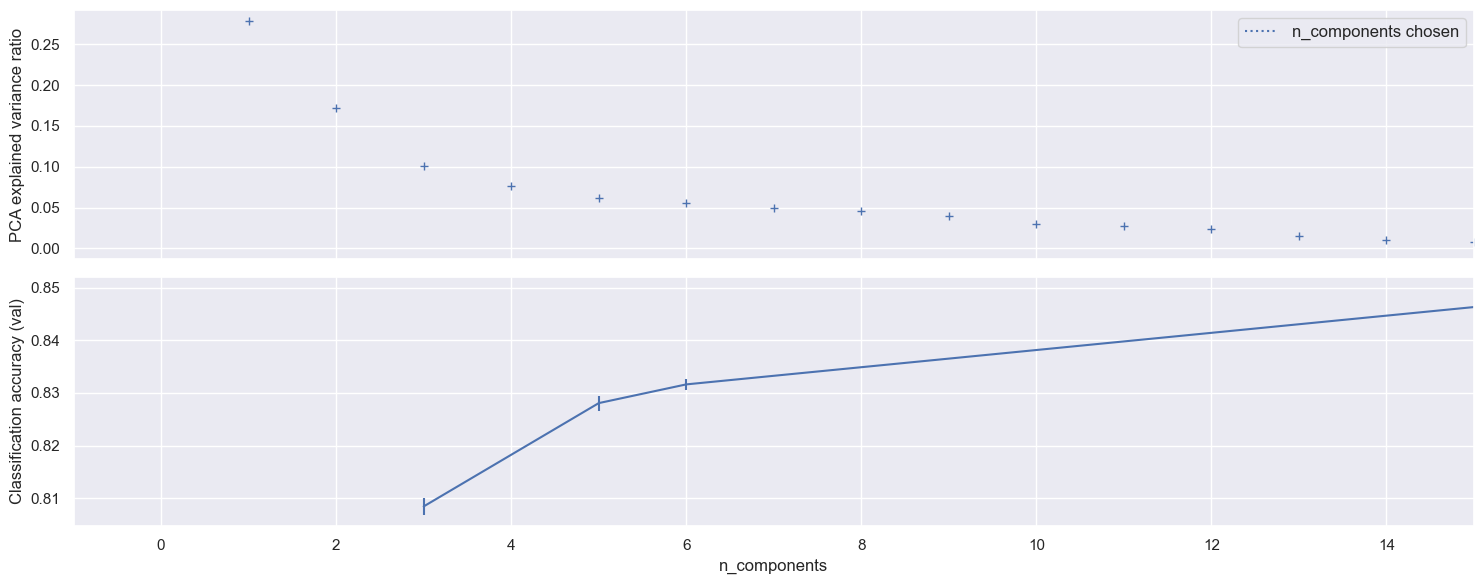

In [604]:
clf = Pipeline(steps=[ 
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('pca', pca),
                       ])
results = clf.fit_transform(X_train,y_train)
pca = PCA(n_components=17).fit(results)


fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(15, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 15)

plt.tight_layout()

plt.show()

In [605]:
results = clf.fit_transform(X_train,y_test)
pca = PCA(n_components=2).fit(results).transform(results)


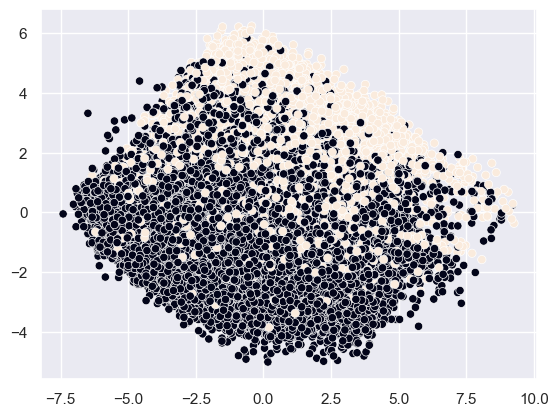

In [608]:
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], c=y_train)
plt.show()

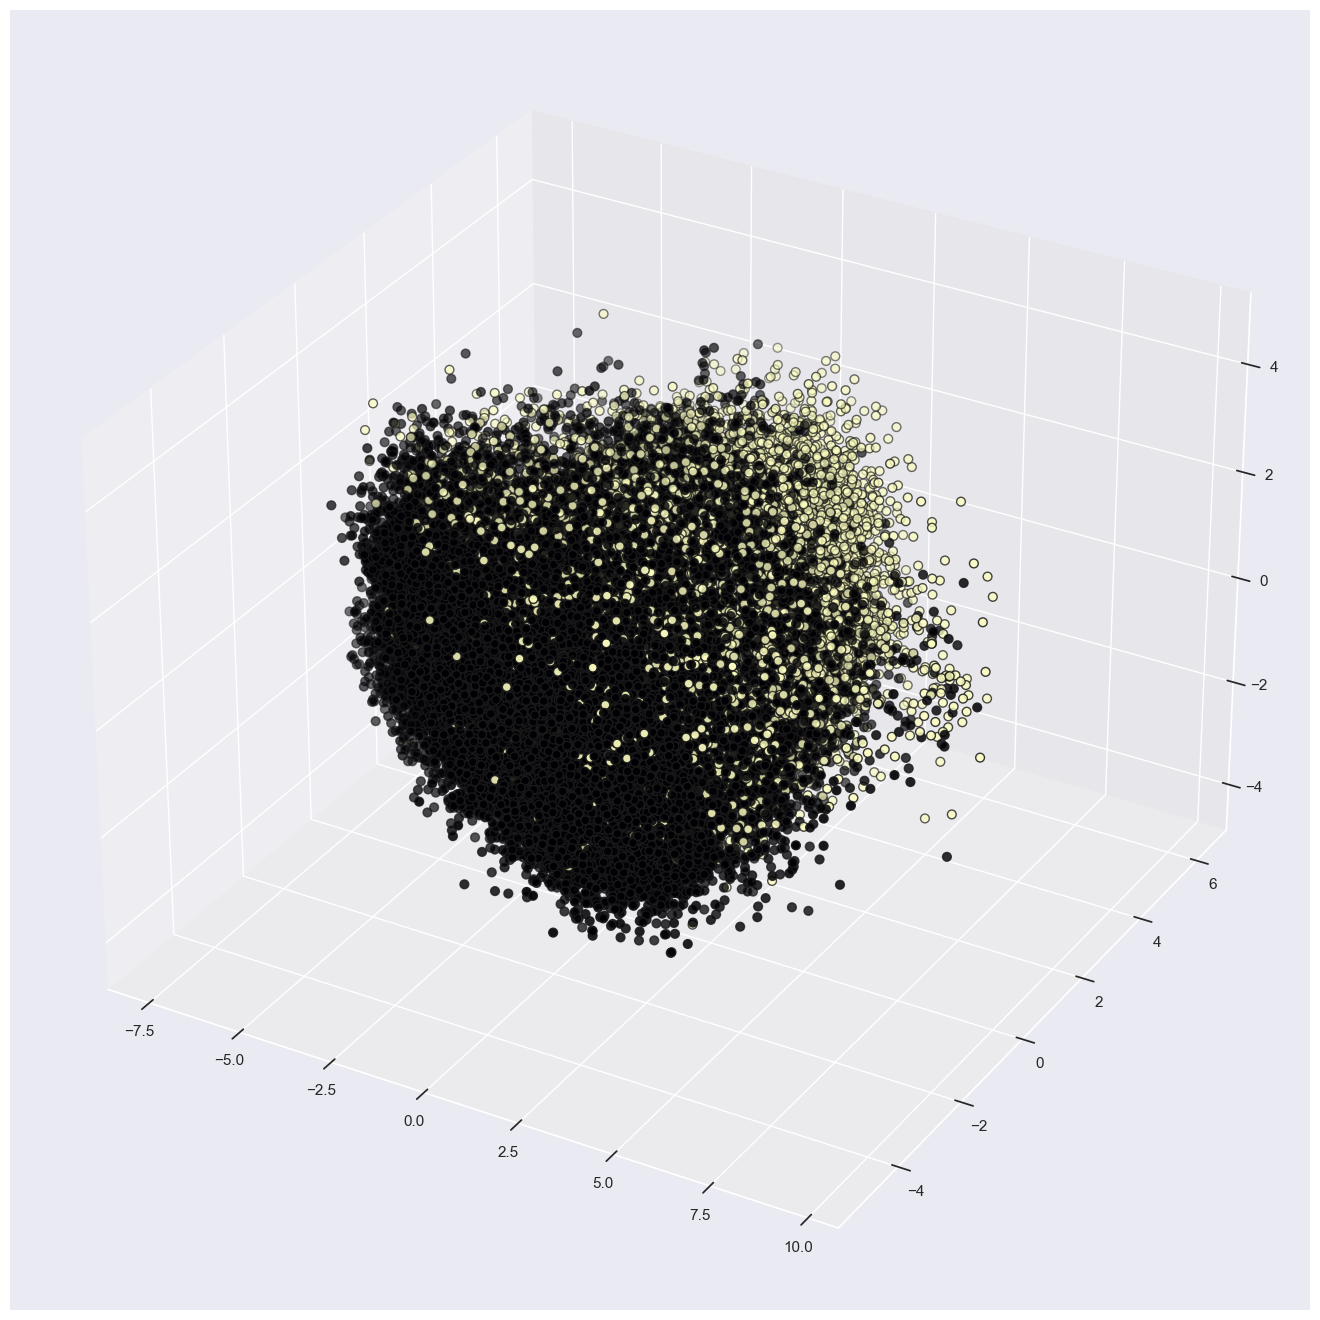

In [609]:
results = clf.fit_transform(X_train, y_train)
pca = PCA(n_components=3).fit(results).transform(results)
fig = plt.figure(1, figsize=(13,13))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
p = ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c=y_train,
           cmap=plt.cm.magma, edgecolor='k', s=40)
plt.show()

In [613]:
pca = PCA(n_components=17)
clf = Pipeline(steps=[
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('resampling', SMOTE(random_state=42)),
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('pca', pca),
                          ('model_' , LogisticRegression())])

    

model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test, y_pred,digits=5))


ROC Area under Curve = 0.7735935832592729
              precision    recall  f1-score   support

           0    0.92130   0.78174   0.84580     36164
           1    0.49962   0.76544   0.60460     10296

    accuracy                        0.77813     46460
   macro avg    0.71046   0.77359   0.72520     46460
weighted avg    0.82785   0.77813   0.79235     46460



In [ ]:
def print_roc(X_test, y_test, model):
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [614]:
def proceso_model(X_train, y_train, X_test, y_test, modelo, imprimo_roc=False):


    clf = Pipeline(steps=[
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('resampling', SMOTE(random_state=42)),
                          ('scaler', PowerTransformer(method='yeo-johnson')),
                          ('model_' , modelo)])

    

    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred) 
    print("ROC Area under Curve = {}".format(roc_auc))
    print(classification_report(y_test, y_pred,digits=5))
    if imprimo_roc:
        print_roc (X_test, y_test, model)

In [615]:
modelo = LogisticRegressionNumpy()
clf = Pipeline(steps=[
                          ('imputer', IterativeImputer(n_nearest_features=6, max_iter=10, sample_posterior=True)),
                          ('resampling', SMOTE(random_state=42)),
                          ('scaler', PowerTransformer(method='yeo-johnson')),

    ])


xtrain = clf.fit(X_train,y_train).transform(X_train)
xtest = clf.fit(X_test,y_test).transform(X_test)
ytrain = y_train.values.reshape(-1,1)

modelo.fit(xtrain, ytrain,  0.001, 16, 500, 0.9)
y_pred = modelo.predict(xtest)
roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

ROC Area under Curve = 0.7098280672000393
              precision    recall  f1-score   support

           0    0.86311   0.94743   0.90331     36164
           1    0.71891   0.47222   0.57002     10296

    accuracy                        0.84212     46460
   macro avg    0.79101   0.70983   0.73667     46460
weighted avg    0.83116   0.84212   0.82945     46460



In [ ]:
with open('X_train.npy', 'wb') as f:
    np.save(f, xtrain)

with open('X_test.npy', 'wb') as f:
    np.save(f, xtest)

with open('y_train.npy', 'wb') as f:
    np.save(f, y_train) 

with open('y_test.npy', 'wb') as f:
    np.save(f, y_test)  

In [616]:
modelo = RandomForestClassifier( max_depth= None, max_features= 5, n_estimators=25)
proceso_model(X_train, y_train, X_test, y_test, modelo)

ROC Area under Curve = 0.7623693500394086
              precision    recall  f1-score   support

           0    0.89128   0.91810   0.90449     36164
           1    0.67832   0.60664   0.64048     10296

    accuracy                        0.84907     46460
   macro avg    0.78480   0.76237   0.77249     46460
weighted avg    0.84409   0.84907   0.84598     46460



In [617]:
modelo = DecisionTreeClassifier(max_depth=16, max_features='auto')
proceso_model(X_train, y_train, X_test, y_test, modelo)

ROC Area under Curve = 0.7206466438783108
              precision    recall  f1-score   support

           0    0.87829   0.85981   0.86895     36164
           1    0.54147   0.58149   0.56076     10296

    accuracy                        0.79813     46460
   macro avg    0.70988   0.72065   0.71486     46460
weighted avg    0.80364   0.79813   0.80065     46460



In [523]:
modelo = SGDClassifier(alpha=0.0001, max_iter=1000, verbose=0)
proceso_model(X_train, y_train, X_test, y_test, modelo)

ROC Area under Curve = 0.7742447167427811
              precision    recall  f1-score   support

           0    0.91909   0.79402   0.85199     36164
           1    0.51048   0.75447   0.60894     10296

    accuracy                        0.78526     46460
   macro avg    0.71478   0.77424   0.73047     46460
weighted avg    0.82854   0.78526   0.79813     46460



In [524]:
modelo =  LogisticRegression()
proceso_model(X_train, y_train, X_test, y_test, modelo)

ROC Area under Curve = 0.7779737790383737
              precision    recall  f1-score   support

           0    0.92263   0.78808   0.85006     36164
           1    0.50777   0.76787   0.61130     10296

    accuracy                        0.78360     46460
   macro avg    0.71520   0.77797   0.73068     46460
weighted avg    0.83069   0.78360   0.79715     46460



In [525]:
modelo = KNeighborsClassifier(n_neighbors = 8, p = 2)
proceso_model(X_train, y_train, X_test, y_test, modelo)

ROC Area under Curve = 0.7726205865930453
              precision    recall  f1-score   support

           0    0.91036   0.83351   0.87024     36164
           1    0.54895   0.71173   0.61984     10296

    accuracy                        0.80652     46460
   macro avg    0.72966   0.77262   0.74504     46460
weighted avg    0.83027   0.80652   0.81475     46460

